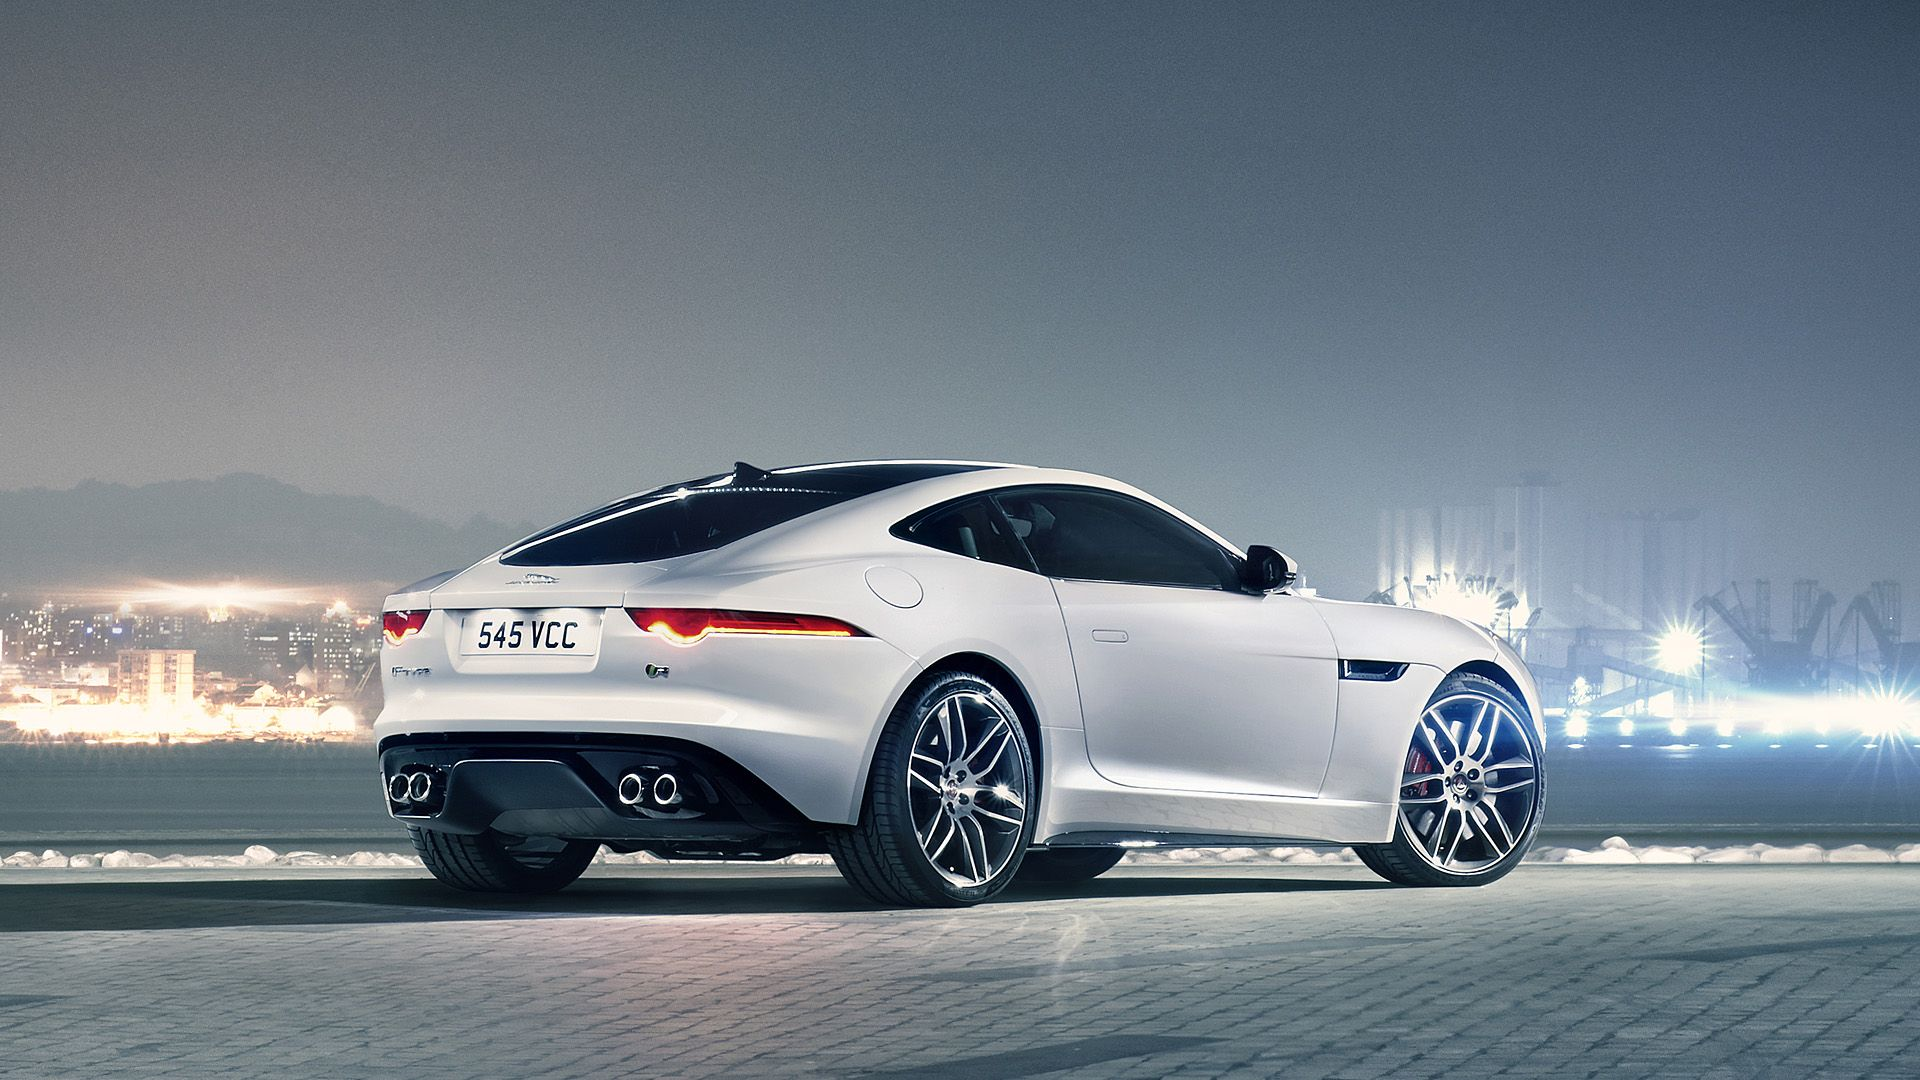

# WELCOME!

# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company( https://www.autoscout24.com ) in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [414]:
df=pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,2.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000000,1.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,1.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000000,1.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


In [415]:
fiyatTahmini = pd.read_csv('final_scout_not_dummy.csv')
df = fiyatTahmini.copy()

In [416]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [417]:
df.columns = ['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kW', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb']

In [418]:
df.columns 

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kW', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb'],
      dtype='object')

##### **Veri Seti**

1. **make_model:** Araç markası ve modeli.

2. **body_type:** Araç gövde tipi (örneğin sedan, hatchback, SUV vb.)

3. **price:** Araç fiyatı.

4. **vat:** KDV durumu.

5. **km:** Araç kilometre bilgisi.

6. **Type:** Araç tipi.

7.  **Fuel:** Yakıt türü.

8. **Gears:** Vites sayısı.

9. **Comfort_Convenience:** Konfor ve kullanılabilirlik özellikleri.

10. **Entertainment_Media:** Eğlence ve medya özellikleri.

11. **Extras:** Ekstralar.

12. **Safety_Security:** Güvenlik özellikleri.

13. **age:** Araç yaşı.

14. **Previous_Owners:** Önceki sahiplerin sayısı.

15.  **hp_kW:** Beygir gücü.

16. **Inspection_new:** Yeni muayene durumu.

17. **Paint_Type:** Boya tipi.

18.  **Upholstery_type:** Döşeme tipi.

19. **Gearing_Type:** Vites tipi.

20. **Displacement_cc:** Silindir hacmi.

21. **Weight_kg:** Araç ağırlığı.

22. **Drive_chain:** Çekiş sistemi.

23. **cons_comb:** Kombine yakıt tüketimi.


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   type                 15915 non-null  object 
 6   fuel                 15915 non-null  object 
 7   gears                15915 non-null  float64
 8   comfort_convenience  15915 non-null  object 
 9   entertainment_media  15915 non-null  object 
 10  extras               15915 non-null  object 
 11  safety_security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  previous_owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  inspection_new       15915 non-null 

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
previous_owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kW,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
inspection_new,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
displacement_cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [292]:
#df[df.duplicated()]

In [31]:
#df.duplicated().sum()

In [293]:
#df = df.drop_duplicates(keep='first')

In [294]:
#df.duplicated().sum()

0

In [419]:
df.shape

(15915, 23)

In [296]:
df.describe(include="object").T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
type,14242,5,Used,10172
fuel,14242,4,Benzine,7558
comfort_convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
entertainment_media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
extras,14242,659,Alloy wheels,5010
safety_security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
paint_type,14242,3,Metallic,13682


In [98]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

# null değerlerin sayısını ve yüzdesini hesaplamak ve bunları bir DataFrame'de sunmak için kullanılır.

,count,percentage
make_model,0,0.0
body_type,0,0.0
price,0,0.0
vat,0,0.0
km,0,0.0
type,0,0.0
fuel,0,0.0
gears,0,0.0
comfort_convenience,0,0.0
entertainment_media,0,0.0


In [14]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

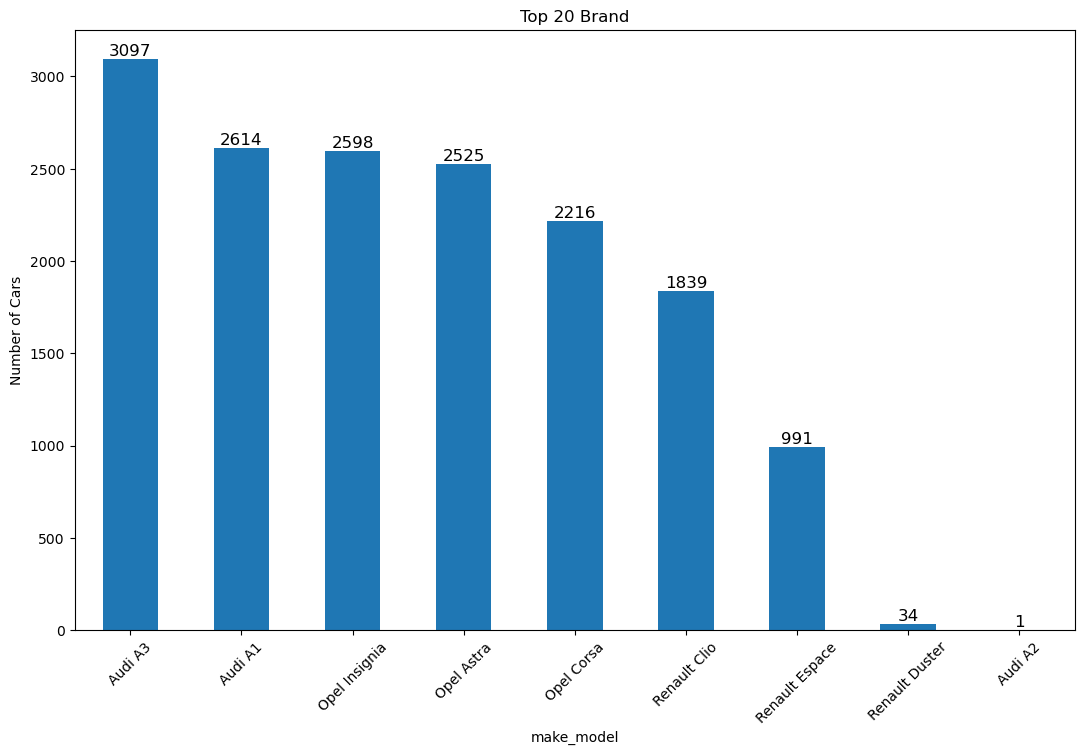

In [15]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make_model.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make_model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

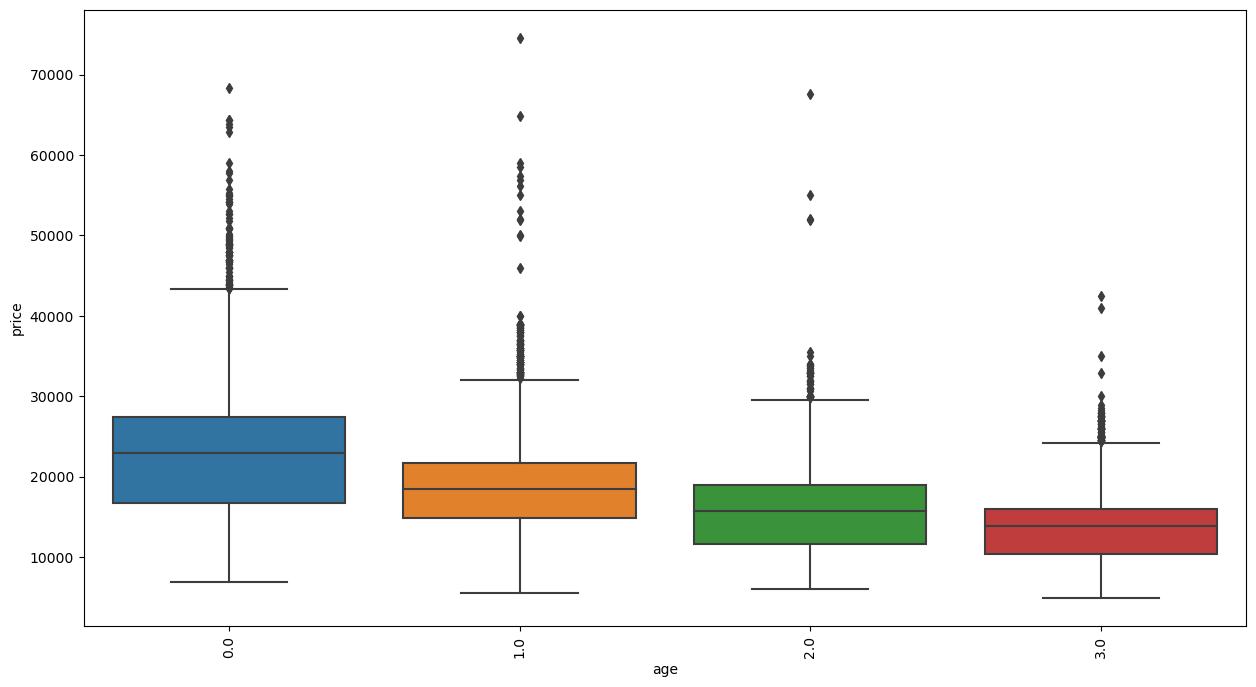

In [16]:
plt.figure(figsize = (15,8))
sns.boxplot(x="age", y="price", data=df)
plt.xticks(rotation = 90);

In [17]:
df.gears.value_counts().sort_values(ascending=False)

gears
6.0    8623
5.0    4257
7.0    2810
8.0     225
Name: count, dtype: int64

In [18]:
df.price.value_counts().sort_values(ascending=False)

price
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
36000      1
41490      1
38880      1
27599      1
39875      1
Name: count, Length: 2952, dtype: int64

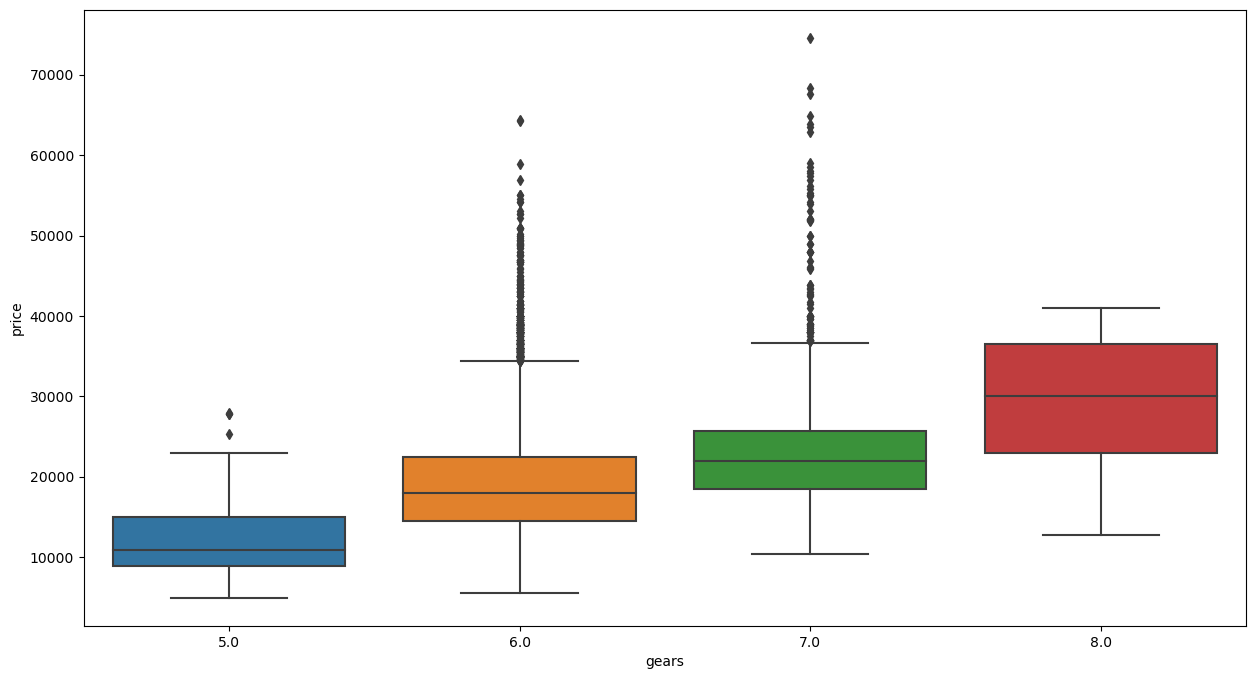

In [19]:
plt.figure(figsize = (15,8))
sns.boxplot(x="gears", y="price", data=df);

In [20]:
df.fuel.unique()

array(['Diesel', 'Benzine', 'LPG/CNG', 'Electric'], dtype=object)

In [21]:
df.fuel.value_counts()

fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

In [22]:
df[df["fuel"] == "Electric"]

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
3356,Audi A3,Compact,24950,VAT deductible,57000.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",3.0,1.0,150.0,0,Metallic,Part/Full Leather,Semi-automatic,1400.0,1280.0,front,4.1
3612,Audi A3,Sedans,38450,Price negotiable,13800.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",1.0,1.0,110.0,0,Metallic,Cloth,Semi-automatic,1395.0,1615.0,front,4.0
3615,Audi A3,Sedans,35899,Price negotiable,20880.0,Used,Electric,6.0,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",1.0,1.0,110.0,0,Metallic,Cloth,Semi-automatic,1395.0,1615.0,front,4.0
3617,Audi A3,Sedans,38000,Price negotiable,12000.0,Used,Electric,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",1.0,1.0,110.0,0,Metallic,Part/Full Leather,Semi-automatic,1395.0,1615.0,front,4.0
13393,Renault Clio,Sedans,8490,VAT deductible,23863.0,Used,Electric,6.0,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,3.0,1.0,55.0,0,Metallic,Part/Full Leather,Automatic,1461.0,1165.0,front,5.0


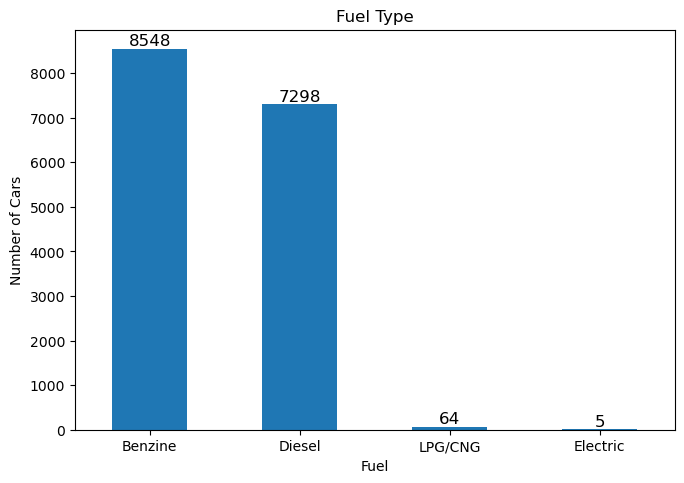

In [23]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.fuel.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('Fuel') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [99]:
df_object=df.select_dtypes(include='object')
df_object

,make_model,body_type,vat,type,fuel,comfort_convenience,entertainment_media,extras,safety_security,paint_type,upholstery_type,gearing_type,drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,VAT deductible,New,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",Metallic,Part/Full Leather,Automatic,front
15911,Renault Espace,Van,VAT deductible,Used,Benzine,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Cloth,Automatic,front
15912,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",Metallic,Part/Full Leather,Automatic,front
15913,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",Metallic,Part/Full Leather,Automatic,front


In [25]:
df_object.entertainment_media

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15910    Bluetooth,Digital radio,Hands-free equipment,O...
15911    Bluetooth,Digital radio,Hands-free equipment,R...
15912    Bluetooth,Hands-free equipment,On-board comput...
15913                    Bluetooth,Digital radio,Radio,USB
15914                                                  USB
Name: entertainment_media, Length: 15915, dtype: object

In [26]:
from collections import Counter

media_counter = Counter()

for media in df_object['entertainment_media']:
    media_list = [media.strip() for media in media.split(',')]
    media_counter.update(media_list)

top_media = media_counter.most_common(20)
top_media

[('On-board computer', 13222),
 ('Radio', 13196),
 ('Bluetooth', 12685),
 ('Hands-free equipment', 10371),
 ('USB', 9019),
 ('MP3', 6258),
 ('CD player', 5024),
 ('Sound system', 2244),
 ('Digital radio', 2241),
 ('Television', 39)]

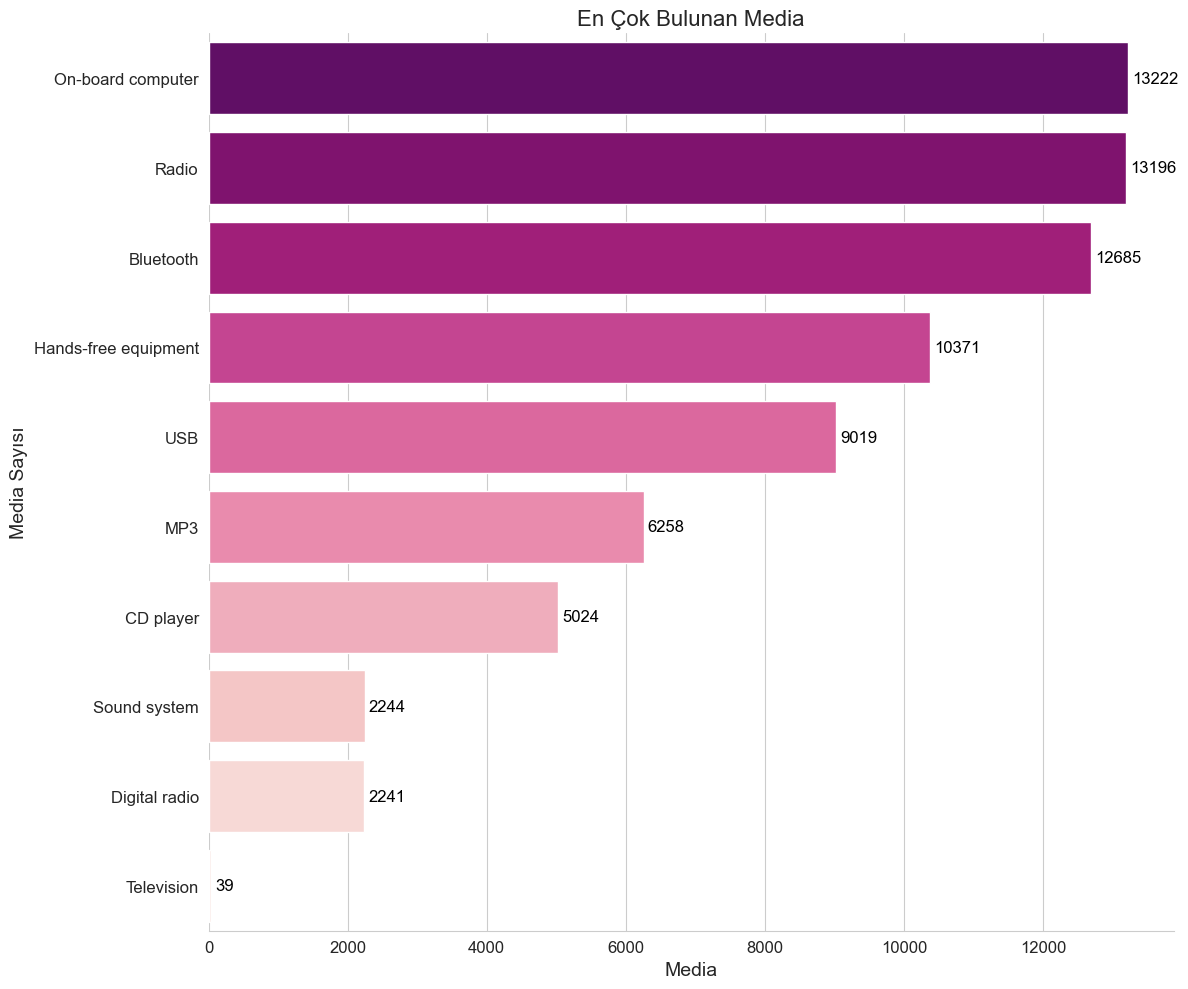

In [27]:
top_media_df = pd.DataFrame(top_media, columns=['entertainment_media', 'make_model'])
sns.set_style('whitegrid')
plt.figure(figsize=(12,10)) # grafiğin boyutunu büyüt
ax = sns.barplot(x='make_model', y='entertainment_media', data=top_media_df, palette='RdPu_r')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
sns.despine(left=True)
plt.title('En Çok Bulunan Media', fontsize=16) # başlık font boyutu büyüsün
plt.xlabel('Media', fontsize=14) # x ekseni başlık font boyutu
plt.ylabel('Media Sayısı', fontsize=14) # y ekseni başlık font boyutu
plt.xticks(fontsize=12, rotation=0) # x ekseni font boyutu ve hizalama ayarları
plt.yticks(fontsize=12) # y ekseni font boyutu
plt.tight_layout()
plt.show()

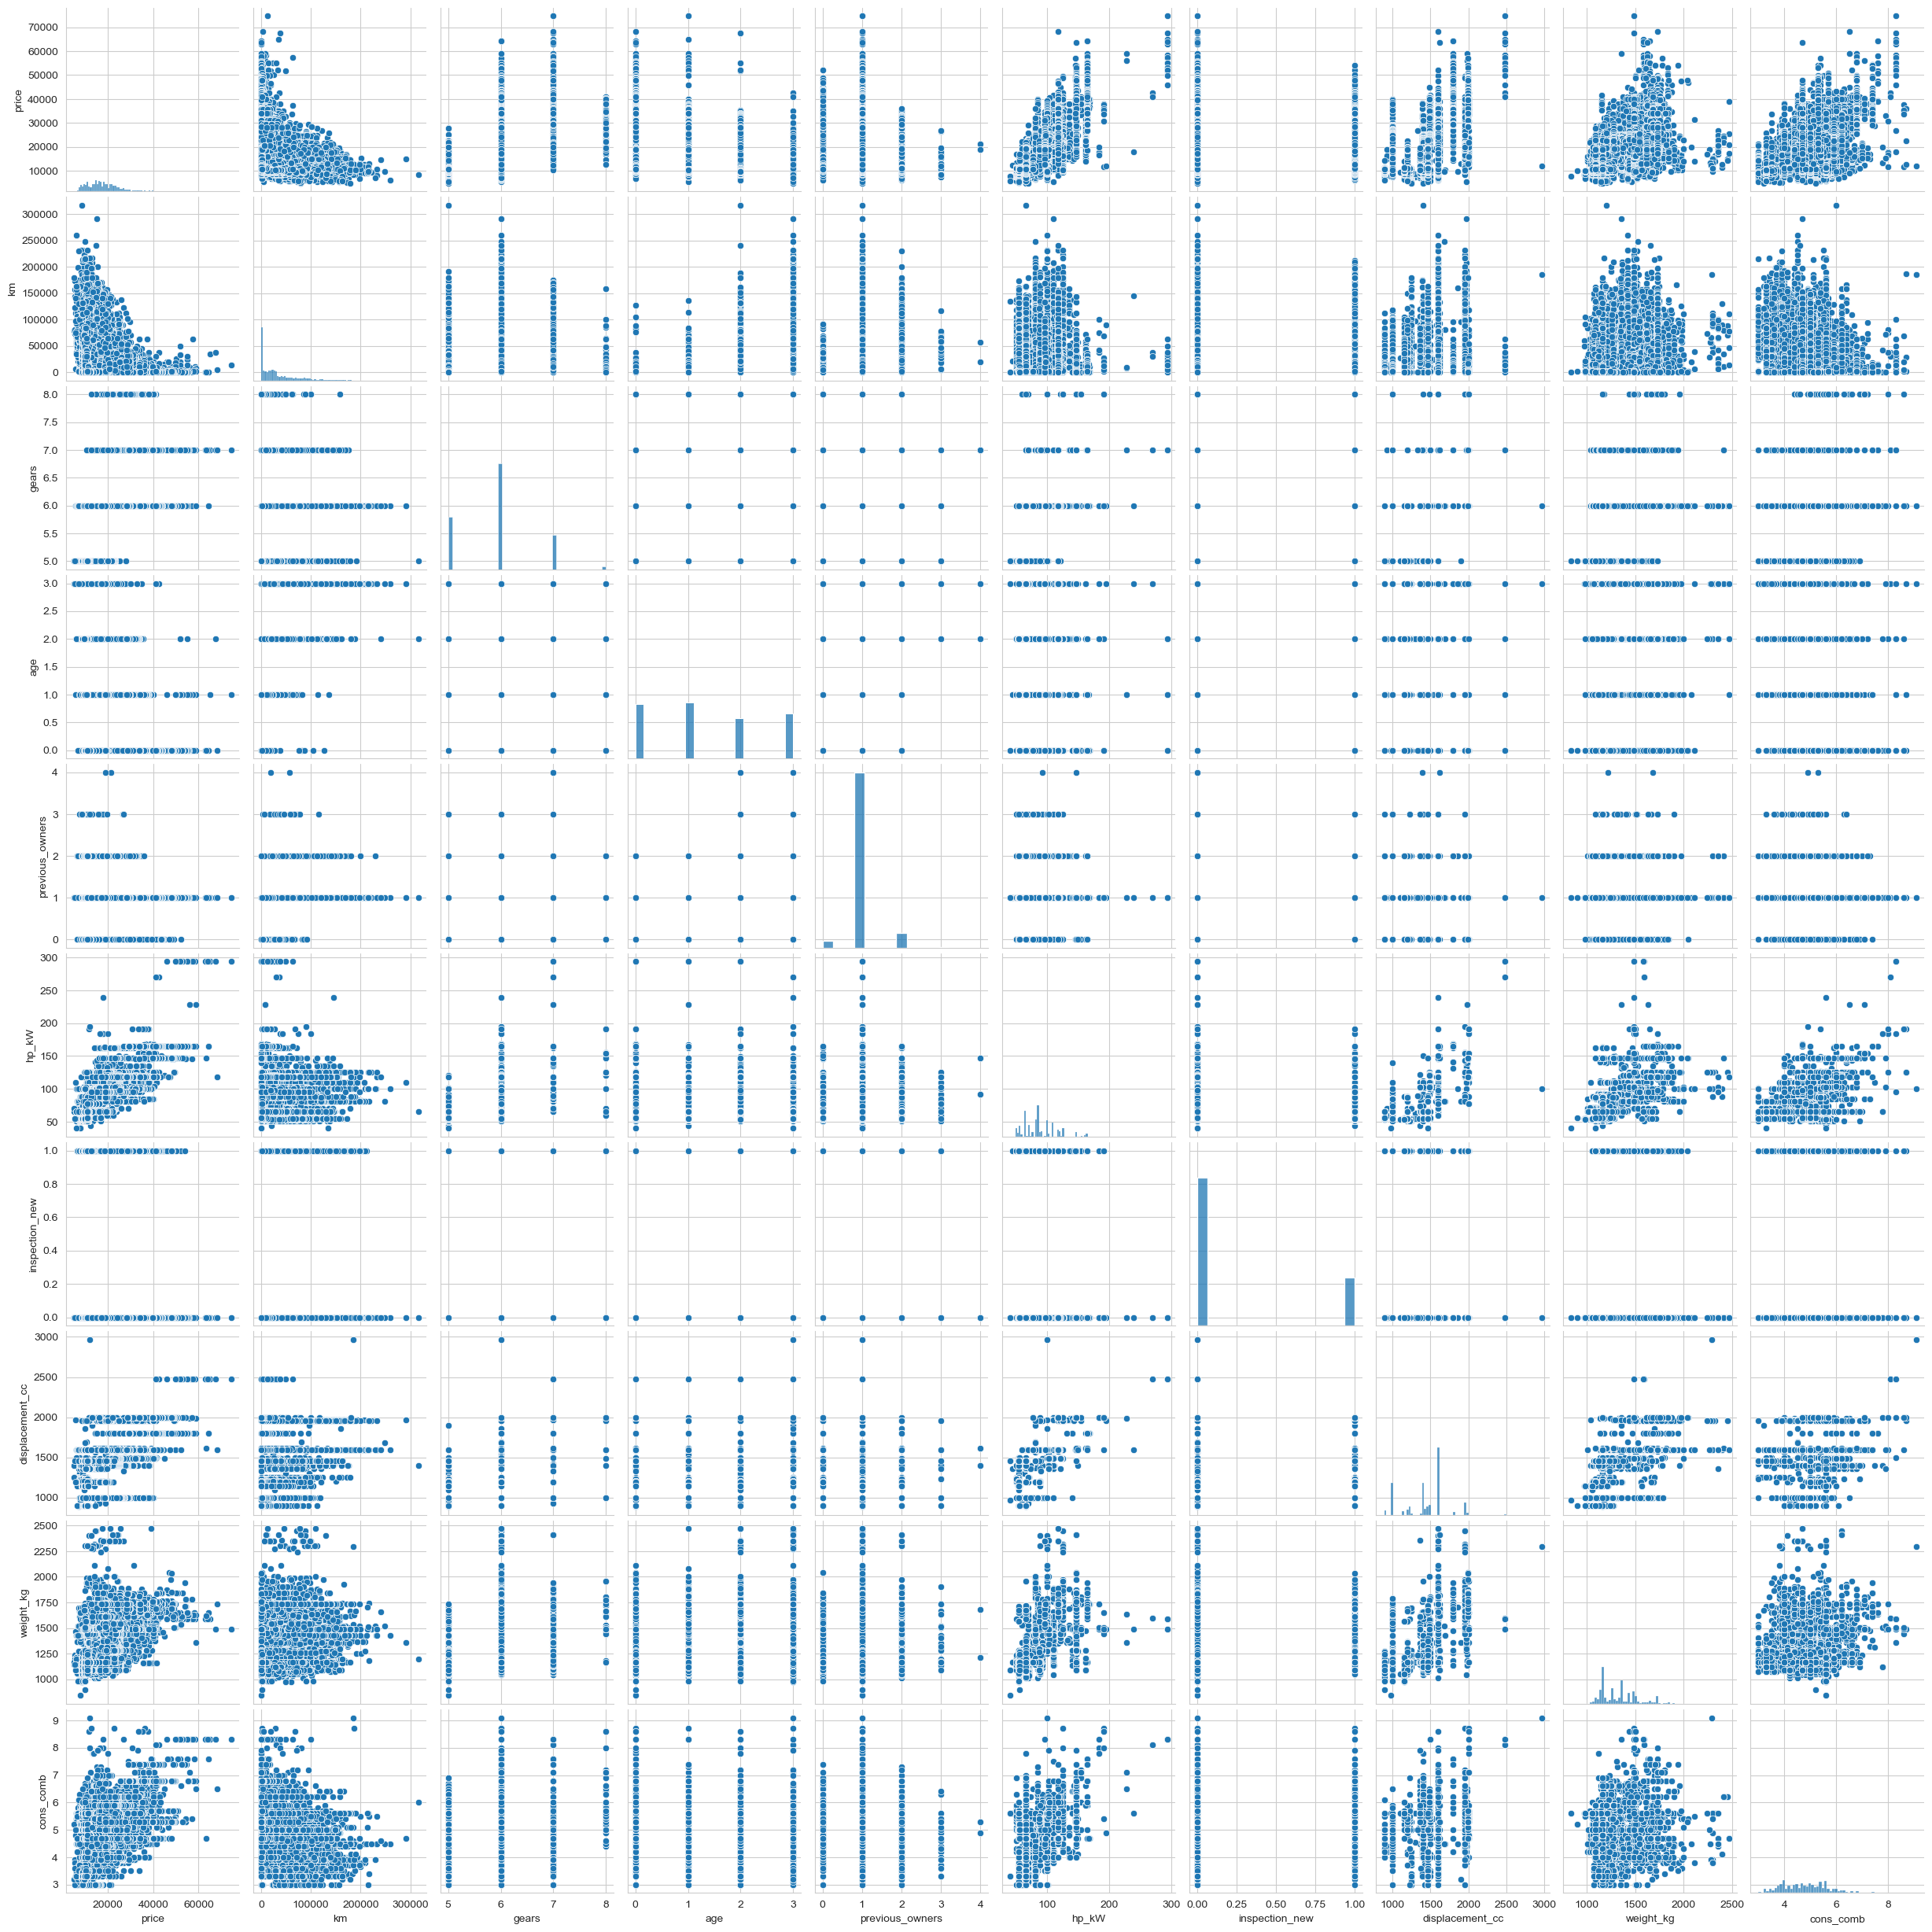

In [28]:
sns.pairplot(df);

In [420]:
df_numeric=df.select_dtypes(include='number')
df_numeric

,price,km,gears,age,previous_owners,hp_kW,inspection_new,displacement_cc,weight_kg,cons_comb
0,15770,56013.000000,7.000000,3.000000,2.000000,66.000000,1,1422.000000,1220.000000,3.800000
1,14500,80000.000000,7.000000,2.000000,1.000000,141.000000,0,1798.000000,1255.000000,5.600000
2,14640,83450.000000,7.000000,3.000000,1.000000,85.000000,0,1598.000000,1135.000000,3.800000
3,14500,73000.000000,6.000000,3.000000,1.000000,66.000000,0,1422.000000,1195.000000,3.800000
4,16790,16200.000000,7.000000,3.000000,1.000000,66.000000,1,1422.000000,1135.000000,4.100000
...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.000000,0.000000,1.000000,147.000000,0,1997.000000,1758.000000,5.300000
15911,39885,9900.000000,7.000000,0.000000,1.000000,165.000000,0,1798.000000,1708.000000,7.400000
15912,39875,15.000000,6.000000,0.000000,1.000000,146.000000,1,1997.000000,1734.000000,5.300000
15913,39700,10.000000,6.000000,0.000000,1.000000,147.000000,0,1997.000000,1758.000000,5.300000


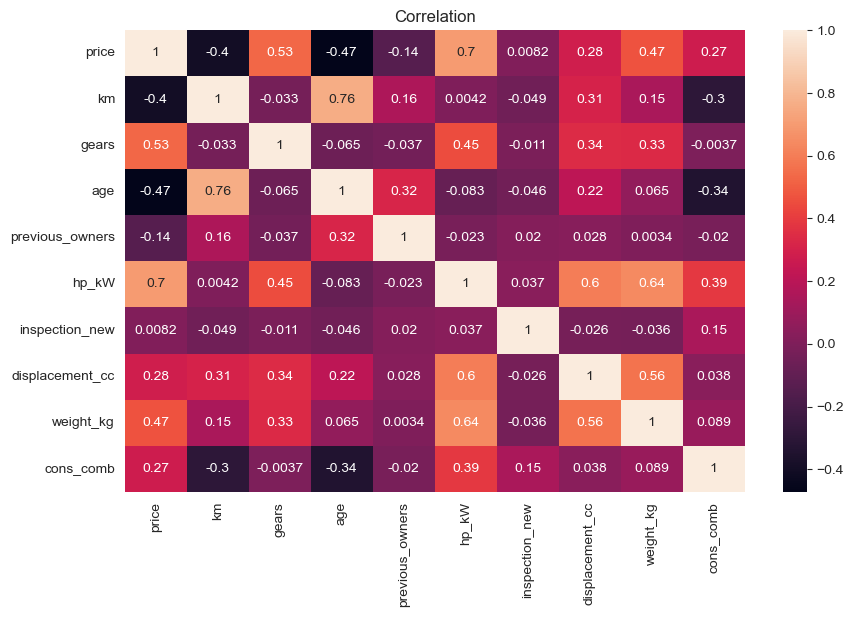

In [101]:
sns.heatmap(df_numeric.corr(),annot=True)
plt.title("Correlation");

In [421]:
df.shape

(15915, 23)

##### Outlier values

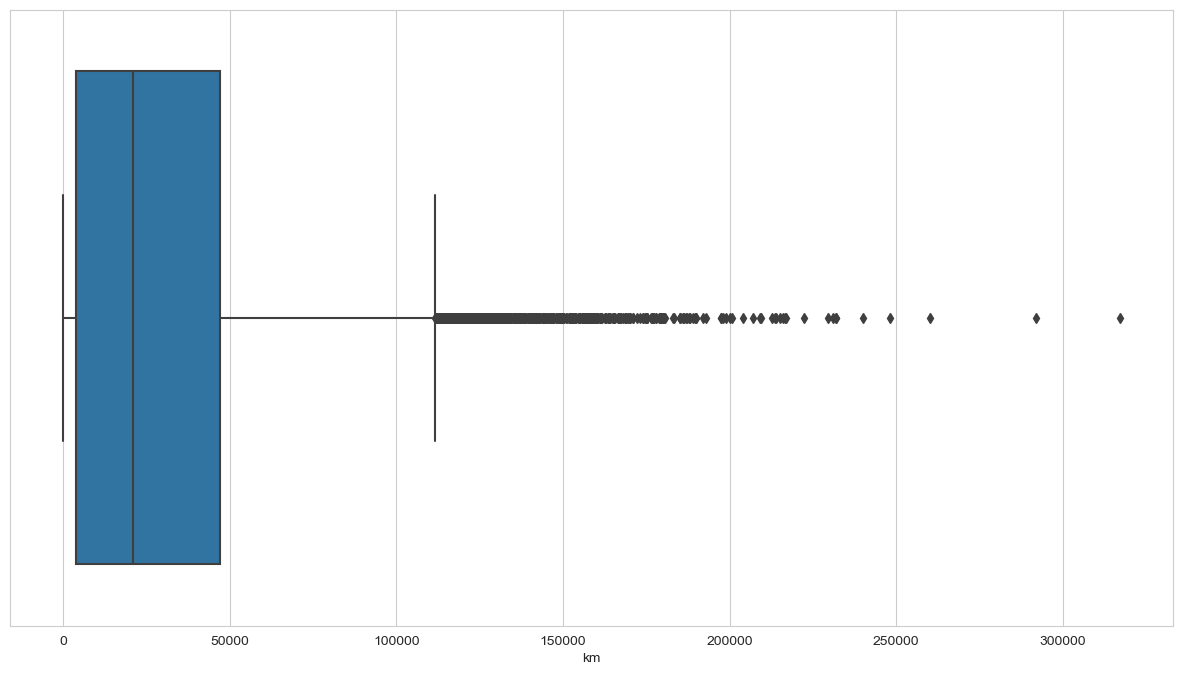

In [299]:
plt.figure(figsize = (15,8))
sns.boxplot(x="km",data=df);

<Axes: >

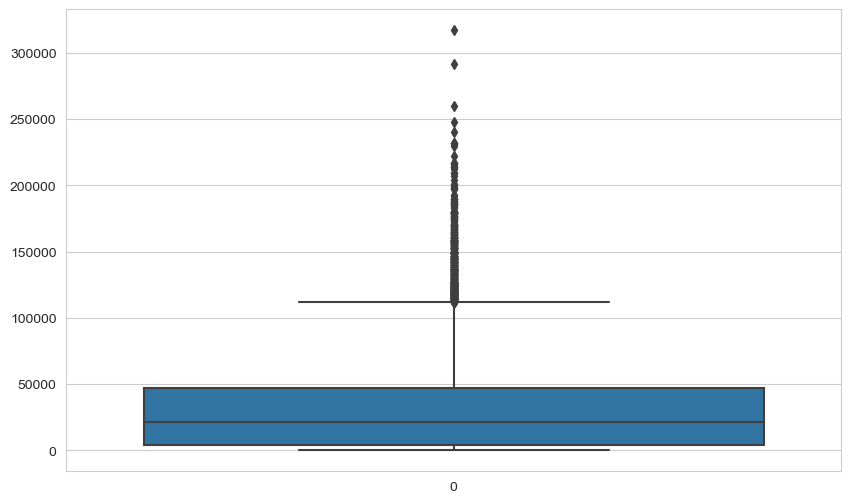

In [300]:
sns.boxplot(data=df["km"])

In [304]:
q1 = df.km.quantile(0.25)
q1

3898.0

In [305]:
q3 = df.km.quantile(0.75)
q3

47000.0

In [306]:
iqr = q3 - q1
iqr

43102.0

In [38]:
# alt_sinir = q1
# alt_sinir

1920.5

In [307]:
ust_sinir = q3 +3 *iqr
ust_sinir 

176306.0

In [308]:
df['km'] = df['km'].apply(lambda x: ust_sinir if x > ust_sinir else x)

In [309]:
df['km']

0       56013.000000
1       80000.000000
2       83450.000000
3       73000.000000
4       16200.000000
            ...     
15907     100.000000
15908    1647.362609
15909    1000.000000
15911    9900.000000
15912      15.000000
Name: km, Length: 14242, dtype: float64

In [310]:
df.km.shape

(14242,)

<Axes: >

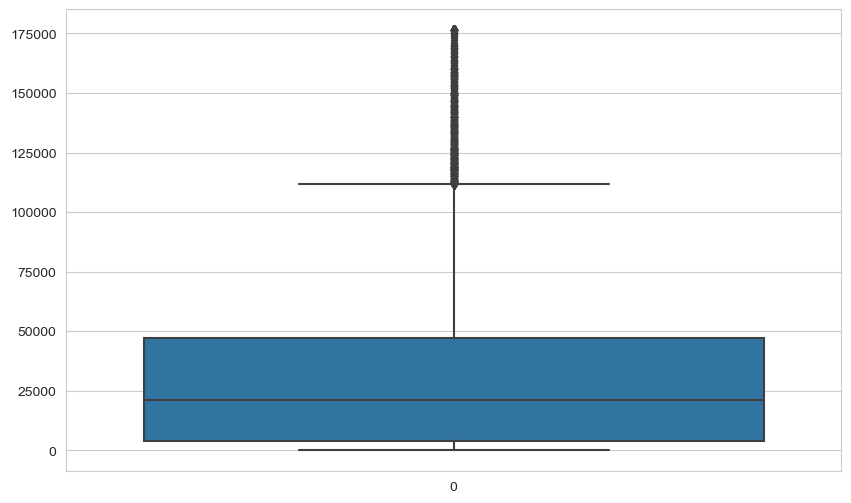

In [311]:
sns.boxplot(data=df["km"])

<Axes: >

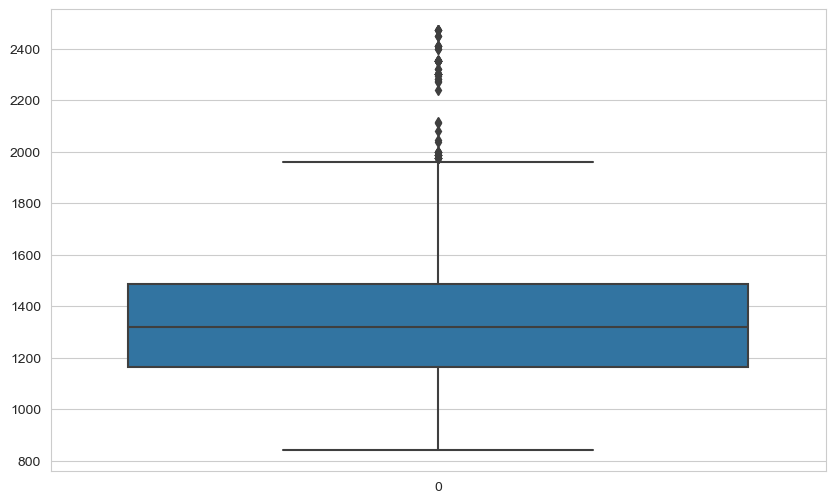

In [312]:
sns.boxplot(data=df["weight_kg"])

In [313]:
q1 = df.weight_kg.quantile(0.25)
q1

1165.0

In [314]:
q3 = df.weight_kg.quantile(0.75)
q3

1487.0

In [315]:
iqr = q3 - q1
iqr

322.0

In [316]:
alt_sinir = q1
alt_sinir

1165.0

In [317]:
ust_sinir = q3 +3 *iqr
ust_sinir 

2453.0

In [318]:
df['weight_kg'] = df['weight_kg'].apply(lambda x: ust_sinir if x > ust_sinir else x)

In [319]:
df['weight_kg']

0       1220.000000
1       1255.000000
2       1135.000000
3       1195.000000
4       1135.000000
            ...    
15907   1734.000000
15908   1758.000000
15909   1734.000000
15911   1708.000000
15912   1734.000000
Name: weight_kg, Length: 14242, dtype: float64

<Axes: >

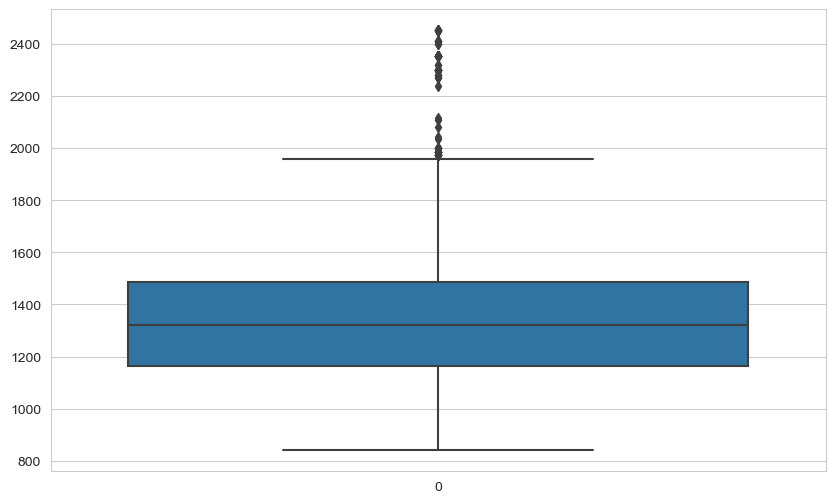

In [320]:
sns.boxplot(data=df["weight_kg"])

In [321]:
df.head()

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,2.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000000,1.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,1.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000000,1.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


<Axes: >

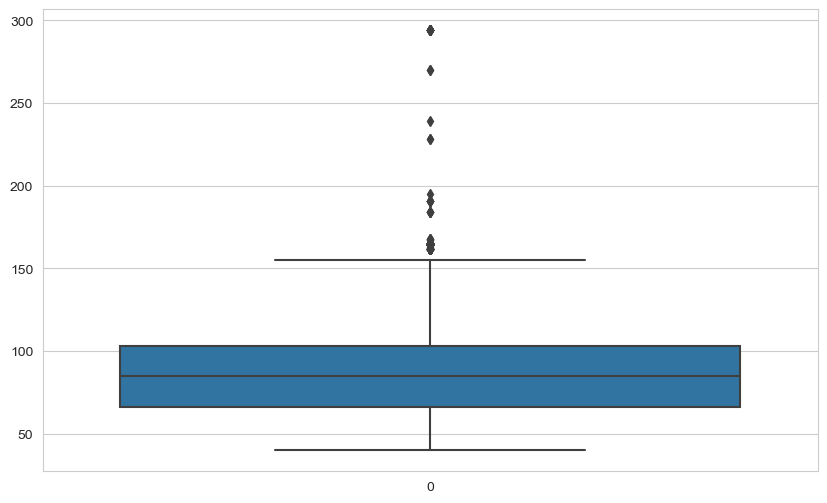

In [322]:
sns.boxplot(data=df["hp_kW"])

In [323]:
q1 = df.hp_kW.quantile(0.25)
q1

66.0

In [324]:
q3 = df.hp_kW.quantile(0.75)
q3

103.0

In [325]:
iqr = q3 - q1
iqr

37.0

In [326]:
alt_sinir = q1
alt_sinir

66.0

In [327]:
ust_sinir = q3 +3 *iqr
ust_sinir 

214.0

In [328]:
df['hp_kW'] = df['hp_kW'].apply(lambda x: ust_sinir if x > ust_sinir else x)

In [329]:
df['hp_kW']

0        66.000000
1       141.000000
2        85.000000
3        66.000000
4        66.000000
           ...    
15907   118.000000
15908   147.000000
15909   165.000000
15911   165.000000
15912   146.000000
Name: hp_kW, Length: 14242, dtype: float64

<Axes: >

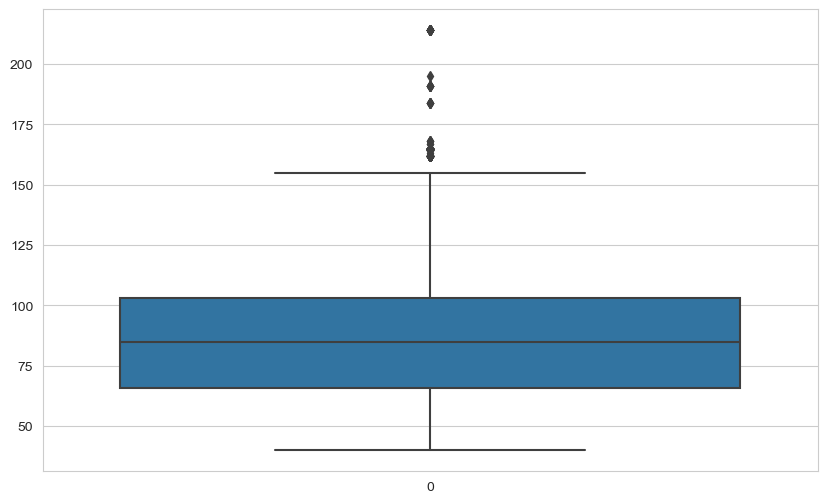

In [330]:
sns.boxplot(data=df["hp_kW"])

In [331]:
df.head()

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,2.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000000,1.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,1.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000000,1.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


<Axes: >

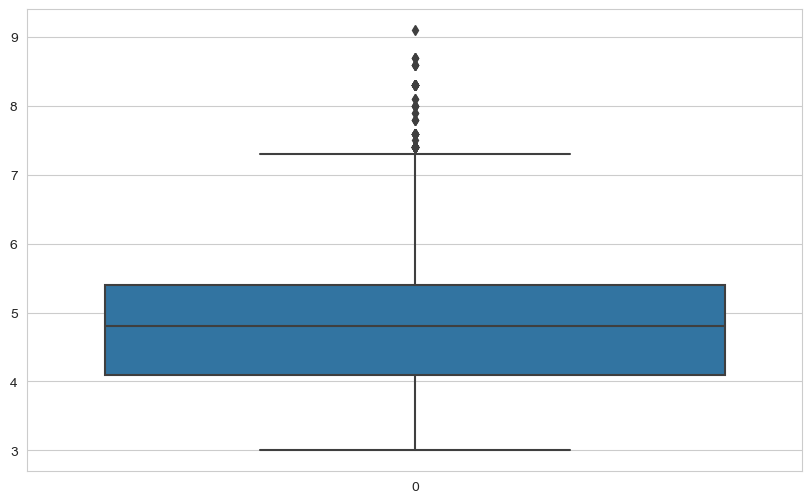

In [332]:
sns.boxplot(data=df["cons_comb"])

In [333]:
q1 = df.cons_comb.quantile(0.25)
q1

4.1

In [334]:
q3 = df.cons_comb.quantile(0.75)
q3

5.4

In [335]:
iqr = q3 - q1
iqr

1.3000000000000007

In [336]:
ust_sinir = q3 +1.5 *iqr
ust_sinir 

7.350000000000001

In [337]:
df['cons_comb'] = df['cons_comb'].apply(lambda x: ust_sinir if x > ust_sinir else x)

In [338]:
df['cons_comb']

0       3.800000
1       5.600000
2       3.800000
3       3.800000
4       4.100000
          ...   
15907   4.700000
15908   5.300000
15909   6.800000
15911   7.350000
15912   5.300000
Name: cons_comb, Length: 14242, dtype: float64

<Axes: >

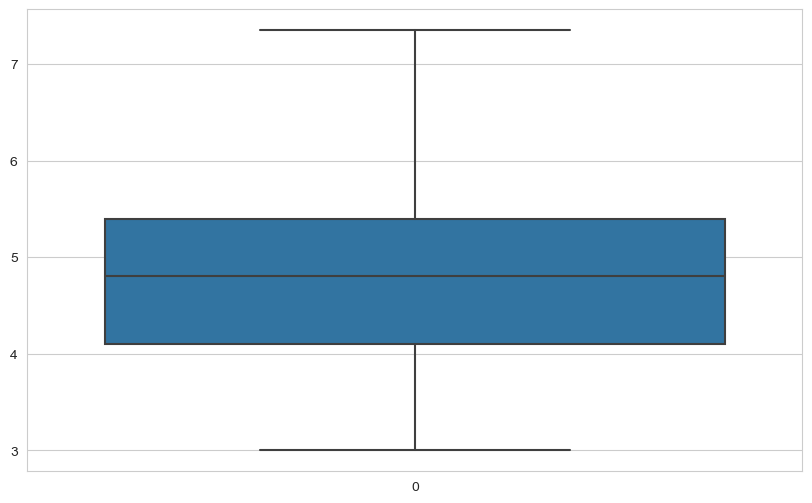

In [339]:
sns.boxplot(data=df["cons_comb"])

In [340]:
df.head()

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,2.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000000,1.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,1.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000000,1.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


##### outlier bitişi

In [341]:
df.head()

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,2.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.000000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000000,1.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.000000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000000,1.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.000000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000000,1.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.000000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


In [342]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [343]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

In [344]:
df.body_type.nunique()

8

In [345]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable'], dtype=object)

In [41]:
df.type.nunique()

5

In [346]:
df.fuel.unique()

array(['Diesel', 'Benzine', 'LPG/CNG', 'Electric'], dtype=object)

In [347]:
df.gears.unique()

array([7., 6., 5., 8.])

In [48]:
df.comfort_convenience.nunique()

6196

In [49]:
df.entertainment_media.nunique()

346

In [50]:
df.extras.nunique()

659

In [51]:
df.safety_security.nunique()

4442

In [348]:
df.paint_type.nunique()

3

In [349]:
df.upholstery_type.nunique()

2

In [350]:
df.gearing_type.nunique()

3

In [351]:
df.drive_chain.nunique()

3

In [352]:
df.sample()

,make_model,body_type,price,vat,km,type,fuel,gears,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
8394,Opel Corsa,Compact,12788,VAT deductible,10.000000,New,Benzine,6.000000,"Air conditioning,Electrical side mirrors,Power...","CD player,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",0.000000,1.000000,66.000000,1,Metallic,Cloth,Automatic,1398.000000,1248.000000,front,6.300000


In [422]:
X = df[["make_model","body_type","vat","km","type","fuel","gears","age","hp_kW","inspection_new","paint_type","upholstery_type","gearing_type","displacement_cc","weight_kg","drive_chain","cons_comb"]]
y = df["price"]

In [423]:
X

,make_model,body_type,vat,km,type,fuel,gears,age,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
0,Audi A1,Sedans,VAT deductible,56013.000000,Used,Diesel,7.000000,3.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,Price negotiable,80000.000000,Used,Benzine,7.000000,2.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,VAT deductible,83450.000000,Used,Diesel,7.000000,3.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,VAT deductible,73000.000000,Used,Diesel,6.000000,3.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,VAT deductible,16200.000000,Used,Diesel,7.000000,3.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,VAT deductible,1647.362609,New,Diesel,6.000000,0.000000,147.000000,0,Metallic,Part/Full Leather,Automatic,1997.000000,1758.000000,front,5.300000
15911,Renault Espace,Van,VAT deductible,9900.000000,Used,Benzine,7.000000,0.000000,165.000000,0,Metallic,Cloth,Automatic,1798.000000,1708.000000,front,7.400000
15912,Renault Espace,Van,VAT deductible,15.000000,Pre-registered,Diesel,6.000000,0.000000,146.000000,1,Metallic,Part/Full Leather,Automatic,1997.000000,1734.000000,front,5.300000
15913,Renault Espace,Van,VAT deductible,10.000000,Pre-registered,Diesel,6.000000,0.000000,147.000000,0,Metallic,Part/Full Leather,Automatic,1997.000000,1758.000000,front,5.300000


In [424]:
X.head()

,make_model,body_type,vat,km,type,fuel,gears,age,hp_kW,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,cons_comb
0,Audi A1,Sedans,VAT deductible,56013.000000,Used,Diesel,7.000000,3.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1220.000000,front,3.800000
1,Audi A1,Sedans,Price negotiable,80000.000000,Used,Benzine,7.000000,2.000000,141.000000,0,Metallic,Cloth,Automatic,1798.000000,1255.000000,front,5.600000
2,Audi A1,Sedans,VAT deductible,83450.000000,Used,Diesel,7.000000,3.000000,85.000000,0,Metallic,Cloth,Automatic,1598.000000,1135.000000,front,3.800000
3,Audi A1,Sedans,VAT deductible,73000.000000,Used,Diesel,6.000000,3.000000,66.000000,0,Metallic,Cloth,Automatic,1422.000000,1195.000000,front,3.800000
4,Audi A1,Sedans,VAT deductible,16200.000000,Used,Diesel,7.000000,3.000000,66.000000,1,Metallic,Cloth,Automatic,1422.000000,1135.000000,front,4.100000


In [425]:
y

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15910    39950
15911    39885
15912    39875
15913    39700
15914    40999
Name: price, Length: 15915, dtype: int64

In [426]:
X_object=X.select_dtypes(include='object')
X_object

,make_model,body_type,vat,type,fuel,paint_type,upholstery_type,gearing_type,drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,VAT deductible,New,Diesel,Metallic,Part/Full Leather,Automatic,front
15911,Renault Espace,Van,VAT deductible,Used,Benzine,Metallic,Cloth,Automatic,front
15912,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,Metallic,Part/Full Leather,Automatic,front
15913,Renault Espace,Van,VAT deductible,Pre-registered,Diesel,Metallic,Part/Full Leather,Automatic,front


In [427]:
X_object.columns

Index(['make_model', 'body_type', 'vat', 'type', 'fuel', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'],
      dtype='object')

## Train | Test Split

In [428]:
from sklearn.model_selection import train_test_split

In [429]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_score

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

##### OneHotEncoding

In [137]:
#pip install category_encoders

In [430]:
X_encoded = pd.get_dummies(X_object, columns=['make_model', 'body_type', 'vat', 'type', 'fuel', 'paint_type',
       'upholstery_type', 'gearing_type', 'drive_chain'], drop_first = True )

In [431]:
X_encoded

,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False
15911,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
15912,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False
15913,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False


In [432]:
X_encoded = X_encoded.astype(int)

In [433]:
X_encoded

,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
15911,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
15912,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0
15913,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [434]:
X_numeric=X.select_dtypes(include='number')
X_numeric

,km,gears,age,hp_kW,inspection_new,displacement_cc,weight_kg,cons_comb
0,56013.000000,7.000000,3.000000,66.000000,1,1422.000000,1220.000000,3.800000
1,80000.000000,7.000000,2.000000,141.000000,0,1798.000000,1255.000000,5.600000
2,83450.000000,7.000000,3.000000,85.000000,0,1598.000000,1135.000000,3.800000
3,73000.000000,6.000000,3.000000,66.000000,0,1422.000000,1195.000000,3.800000
4,16200.000000,7.000000,3.000000,66.000000,1,1422.000000,1135.000000,4.100000
...,...,...,...,...,...,...,...,...
15910,1647.362609,6.000000,0.000000,147.000000,0,1997.000000,1758.000000,5.300000
15911,9900.000000,7.000000,0.000000,165.000000,0,1798.000000,1708.000000,7.400000
15912,15.000000,6.000000,0.000000,146.000000,1,1997.000000,1734.000000,5.300000
15913,10.000000,6.000000,0.000000,147.000000,0,1997.000000,1758.000000,5.300000


In [435]:
X=pd.concat([X_encoded, X_numeric], axis=1 )

In [436]:
X

,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear,km,gears,age,hp_kW,inspection_new,displacement_cc,weight_kg,cons_comb
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,56013.000000,7.000000,3.000000,66.000000,1,1422.000000,1220.000000,3.800000
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,80000.000000,7.000000,2.000000,141.000000,0,1798.000000,1255.000000,5.600000
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,83450.000000,7.000000,3.000000,85.000000,0,1598.000000,1135.000000,3.800000
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,73000.000000,6.000000,3.000000,66.000000,0,1422.000000,1195.000000,3.800000
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,16200.000000,7.000000,3.000000,66.000000,1,1422.000000,1135.000000,4.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1647.362609,6.000000,0.000000,147.000000,0,1997.000000,1758.000000,5.300000
15911,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,9900.000000,7.000000,0.000000,165.000000,0,1798.000000,1708.000000,7.400000
15912,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,15.000000,6.000000,0.000000,146.000000,1,1997.000000,1734.000000,5.300000
15913,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,10.000000,6.000000,0.000000,147.000000,0,1997.000000,1758.000000,5.300000


In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Veri Ölçeklendirme (Scale) ve Bilgi Sızıntısı (Data Leakage)

In [438]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [439]:
scaler = StandardScaler()

### Model Fit & Scale

In [440]:
scaler.fit(X_train)

#scaler.fit_transform(X_train) Ayrı ayrı yerine bu şekilde kullanımı önerilir

StandardScaler()

In [441]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.        , -0.49109838, -0.43361162, ..., -1.92665275,
        -1.10461463,  0.19448875],
       [ 0.        , -0.49109838, -0.43361162, ..., -1.56068681,
        -1.01921823, -0.03556939],
       [ 0.        , -0.49109838,  2.30621127, ..., -0.11494016,
         0.4325206 , -0.3806566 ],
       ...,
       [ 0.        , -0.49109838, -0.43361162, ..., -0.02797795,
        -0.59725954, -0.95580194],
       [ 0.        , -0.49109838, -0.43361162, ...,  2.05549153,
         2.1052854 ,  0.53957596],
       [ 0.        , -0.49109838,  2.30621127, ..., -0.11131673,
        -0.3310237 ,  0.65460503]])

In [442]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.        , -0.49109838, -0.43361162, ...,  0.60974488,
         0.7439663 , -0.03556939],
       [ 0.        , -0.49109838,  2.30621127, ..., -1.56068681,
        -0.3310237 ,  0.07945968],
       [ 0.        , -0.49109838,  2.30621127, ..., -1.56431023,
        -0.3310237 ,  0.07945968],
       ...,
       [ 0.        , -0.49109838,  2.30621127, ..., -0.11131673,
        -0.3310237 ,  0.99969223],
       [ 0.        , -0.49109838, -0.43361162, ..., -0.02797795,
        -0.59725954, -0.95580194],
       [ 0.        ,  2.03625189, -0.43361162, ...,  0.24740236,
        -0.17027753,  0.53957596]])

In [443]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
mean,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000
std,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [444]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round().T

,mean,std
0,0.000000,0.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.000000,1.000000
4,-0.000000,1.000000
5,0.000000,1.000000
6,0.000000,1.000000
7,0.000000,1.000000
8,0.000000,1.000000
9,-0.000000,1.000000


In [445]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   make_model_Audi A2                 15915 non-null  int32  
 1   make_model_Audi A3                 15915 non-null  int32  
 2   make_model_Opel Astra              15915 non-null  int32  
 3   make_model_Opel Corsa              15915 non-null  int32  
 4   make_model_Opel Insignia           15915 non-null  int32  
 5   make_model_Renault Clio            15915 non-null  int32  
 6   make_model_Renault Duster          15915 non-null  int32  
 7   make_model_Renault Espace          15915 non-null  int32  
 8   body_type_Convertible              15915 non-null  int32  
 9   body_type_Coupe                    15915 non-null  int32  
 10  body_type_Off-Road                 15915 non-null  int32  
 11  body_type_Sedans                   15915 non-null  int

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [446]:
from sklearn.linear_model import LinearRegression

In [447]:
lm = LinearRegression()

In [448]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [449]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [450]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [451]:
pd.set_option('display.float_format', '{:.6f}'.format)

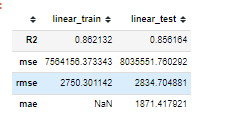

1. **Değerlendirme** : önceden duplicate verileri silmiştim var aykırı değerleri silmiştim. Test skorum böyle geldi. Şimdi tekrar deneyeceğim

In [453]:
#np.set_printoptions(suppress = True)
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 

ls


,linear_train,linear_test
R2,0.865505,0.873112
mse,7344852.666620,6847818.469058
rmse,2710.138865,2616.833672
mae,NaN,1850.489890


## Cross-Validation: Model Performansının Değerlendirilmesi

In [454]:
from sklearn.model_selection import cross_validate, cross_val_score

In [455]:
import sklearn.metrics
for i in dir(sklearn.metrics):
    print(i)

ConfusionMatrixDisplay
DetCurveDisplay
DistanceMetric
PrecisionRecallDisplay
PredictionErrorDisplay
RocCurveDisplay
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_classification
_dist_metrics
_pairwise_distances_reduction
_pairwise_fast
_plot
_ranking
_regression
_scorer
accuracy_score
adjusted_mutual_info_score
adjusted_rand_score
auc
average_precision_score
balanced_accuracy_score
brier_score_loss
calinski_harabasz_score
check_scoring
class_likelihood_ratios
classification_report
cluster
cohen_kappa_score
completeness_score
confusion_matrix
consensus_score
coverage_error
d2_absolute_error_score
d2_pinball_score
d2_tweedie_score
davies_bouldin_score
dcg_score
det_curve
euclidean_distances
explained_variance_score
f1_score
fbeta_score
fowlkes_mallows_score
get_scorer
get_scorer_names
hamming_loss
hinge_loss
homogeneity_completeness_v_measure
homogeneity_score
jaccard_score
label_ranking_average_precision_score
label_ranking_los

In [456]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 10)

In [457]:
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.026372,0.005001,0.839798,-1979.288604,-8640216.953699,-2939.424596
2,0.017160,0.003000,0.874634,-1900.085598,-6680530.432200,-2584.672210
3,0.016058,0.004096,0.856366,-1932.878427,-8157994.914120,-2856.220390
4,0.019213,0.003001,0.881725,-1847.275744,-6580744.200395,-2565.296123
5,0.021160,0.005154,0.849480,-1903.134087,-7843925.119963,-2800.700827
6,0.022000,0.005000,0.863778,-1797.592908,-6768065.611708,-2601.550617
7,0.014929,0.012262,0.871429,-1840.992563,-6549721.448105,-2559.242358
8,0.018658,0.004379,0.857912,-1984.571670,-8752750.961599,-2958.504852
9,0.020126,0.004000,0.870110,-1889.224537,-7954453.853574,-2820.364135
10,0.006053,0.015630,0.869981,-1723.776671,-6557650.695382,-2560.791029


In [458]:
cv_df = pd.DataFrame(scores, index=range(1, 11)).add_prefix("cv_")
cv_df

,cv_fit_time,cv_score_time,cv_test_r2,cv_test_neg_mean_absolute_error,cv_test_neg_mean_squared_error,cv_test_neg_root_mean_squared_error
1,0.026372,0.005001,0.839798,-1979.288604,-8640216.953699,-2939.424596
2,0.017160,0.003000,0.874634,-1900.085598,-6680530.432200,-2584.672210
3,0.016058,0.004096,0.856366,-1932.878427,-8157994.914120,-2856.220390
4,0.019213,0.003001,0.881725,-1847.275744,-6580744.200395,-2565.296123
5,0.021160,0.005154,0.849480,-1903.134087,-7843925.119963,-2800.700827
6,0.022000,0.005000,0.863778,-1797.592908,-6768065.611708,-2601.550617
7,0.014929,0.012262,0.871429,-1840.992563,-6549721.448105,-2559.242358
8,0.018658,0.004379,0.857912,-1984.571670,-8752750.961599,-2958.504852
9,0.020126,0.004000,0.870110,-1889.224537,-7954453.853574,-2820.364135
10,0.006053,0.015630,0.869981,-1723.776671,-6557650.695382,-2560.791029


In [459]:
cv_df.iloc[:, 2:].mean()

cv_test_r2                                   0.863521
cv_test_neg_mean_absolute_error          -1879.882081
cv_test_neg_mean_squared_error        -7448605.419075
cv_test_neg_root_mean_squared_error      -2724.676714
dtype: float64

In [460]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.865505,0.873112
mse,7344852.666620,6847818.469058
rmse,2710.138865,2616.833672
mae,NaN,1850.489890


In [467]:
lm.coef_

array([ 5.77546678e-16,  3.91722431e+02, -1.48356046e+03, -1.89435061e+03,
       -4.74146194e+02, -1.77648771e+03, -4.96589549e+02,  8.71763083e+02,
       -4.61063341e+01, -7.73139054e+00,  6.22105664e+00,  3.37243215e+01,
        1.23857782e+02, -8.16419611e+01,  4.40503432e+02,  6.33634768e+01,
       -9.38169092e+02, -4.89788959e+02, -8.96731315e+02, -1.56734054e+03,
        4.58075864e+02,  6.75810100e+01,  5.53754069e+01,  1.09309063e+02,
        1.49089792e+01,  3.54511302e+02, -7.43944472e+02,  4.62623119e+02,
       -2.72921650e+02, -7.51935437e+01, -1.32640470e+03,  4.73319344e+02,
       -2.01207757e+03,  2.75091873e+03, -8.57907677e+01, -1.71968706e+02,
       -2.55819363e+02,  1.67539126e+02])

In [468]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,0.000000
1,391.722431
2,-1483.560463
3,-1894.350608
4,-474.146194
5,-1776.487712
6,-496.589549
7,871.763083
8,-46.106334
9,-7.731391


# Regularization

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [469]:
from sklearn.linear_model import Ridge

In [470]:
ridge_model = Ridge(alpha=1.0, random_state = 42)

In [471]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [472]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [473]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.865505,0.873113
mse,7344853.275594,6847799.293250
rmse,2710.138977,2616.830008
mae,NaN,1850.466510


In [474]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.865505,0.873112,0.865505,0.873113
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250
rmse,2710.138865,2616.833672,2710.138977,2616.830008
mae,NaN,1850.489890,NaN,1850.466510


### For Ridge Regression CV with alpha : 1

In [475]:
model = Ridge(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv =10)

In [476]:
pd.DataFrame(scores, index=range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.011161,0.003999,0.839806,-1979.214360,-8639792.805638,-2939.352447
2,0.013146,0.002999,0.874639,-1900.005983,-6680279.250026,-2584.623619
3,0.010250,0.003000,0.856365,-1932.843140,-8158081.959688,-2856.235627
4,0.009312,0.002998,0.881723,-1847.248636,-6580837.525888,-2565.314313
5,0.012165,0.003999,0.849487,-1903.052495,-7843538.142505,-2800.631740
6,0.010187,0.003000,0.863776,-1797.578425,-6768170.358915,-2601.570748
7,0.010158,0.003000,0.871432,-1840.957901,-6549597.037998,-2559.218052
8,0.013001,0.004997,0.857903,-1984.594216,-8753293.290746,-2958.596507
9,0.012158,0.004000,0.870108,-1889.181629,-7954563.572521,-2820.383586
10,0.012000,0.005299,0.869983,-1723.736937,-6557571.380418,-2560.775543


In [477]:
cvr_df = pd.DataFrame(scores, index=range(1, 11)).add_prefix("cvr_")
cvr_df

,cvr_fit_time,cvr_score_time,cvr_test_r2,cvr_test_neg_mean_absolute_error,cvr_test_neg_mean_squared_error,cvr_test_neg_root_mean_squared_error
1,0.011161,0.003999,0.839806,-1979.214360,-8639792.805638,-2939.352447
2,0.013146,0.002999,0.874639,-1900.005983,-6680279.250026,-2584.623619
3,0.010250,0.003000,0.856365,-1932.843140,-8158081.959688,-2856.235627
4,0.009312,0.002998,0.881723,-1847.248636,-6580837.525888,-2565.314313
5,0.012165,0.003999,0.849487,-1903.052495,-7843538.142505,-2800.631740
6,0.010187,0.003000,0.863776,-1797.578425,-6768170.358915,-2601.570748
7,0.010158,0.003000,0.871432,-1840.957901,-6549597.037998,-2559.218052
8,0.013001,0.004997,0.857903,-1984.594216,-8753293.290746,-2958.596507
9,0.012158,0.004000,0.870108,-1889.181629,-7954563.572521,-2820.383586
10,0.012000,0.005299,0.869983,-1723.736937,-6557571.380418,-2560.775543


In [478]:
cvr_df.iloc[:, 2:].mean()

cvr_test_r2                                   0.863522
cvr_test_neg_mean_absolute_error          -1879.841372
cvr_test_neg_mean_squared_error        -7448572.532434
cvr_test_neg_root_mean_squared_error      -2724.670218
dtype: float64

In [479]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:, 2:].mean()

test_r2                                   0.863522
test_neg_mean_absolute_error          -1879.841372
test_neg_mean_squared_error        -7448572.532434
test_neg_root_mean_squared_error      -2724.670218
dtype: float64

In [480]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.865505,0.873113
mse,7344853.275594,6847799.293250
rmse,2710.138977,2616.830008
mae,NaN,1850.466510


## Overfitting Sorununun Çözülmesi

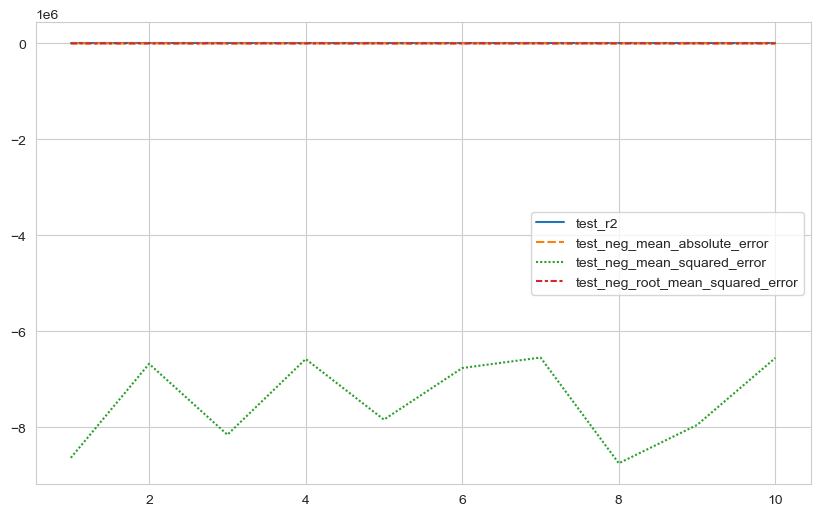

In [481]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

### Ridge Model Katsayıları

In [482]:
ridge_model.coef_

array([    0.        ,   391.95559864, -1483.04763815, -1894.22723452,
        -473.582998  , -1776.07480372,  -496.52444424,   871.98803113,
         -46.10496302,    -7.72553133,     6.13628425,    33.68018387,
         123.67842402,   -81.65079186,   440.59761537,    63.38325582,
        -937.5973248 ,  -489.0841408 ,  -896.09423669, -1566.43639883,
         457.37383752,    67.58328113,    55.307888  ,   109.2717958 ,
          14.89500593,   354.58593325,  -743.91793678,   462.63153777,
        -272.95703874,   -75.19528043, -1326.39919068,   473.58691291,
       -2011.92003141,  2750.01731297,   -85.76076664,  -171.41034563,
        -255.57850169,   167.41527499])

In [483]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [484]:
pd.concat([lm_df, rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,0.000000,0.000000
1,391.722431,391.955599
2,-1483.560463,-1483.047638
3,-1894.350608,-1894.227235
4,-474.146194,-473.582998
5,-1776.487712,-1776.074804
6,-496.589549,-496.524444
7,871.763083,871.988031
8,-46.106334,-46.104963
9,-7.731391,-7.725531


#### Choosing best alpha value with Cross Validation (CV) (Rigde) (En İyi Alpha Değerinin Seçimi)

In [485]:
from sklearn.linear_model import RidgeCV

In [550]:
alpha_space = np.linspace(20,30, 10)
alpha_space

array([20.        , 21.11111111, 22.22222222, 23.33333333, 24.44444444,
       25.55555556, 26.66666667, 27.77777778, 28.88888889, 30.        ])

In [551]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv= 5, scoring = "neg_root_mean_squared_error")

In [552]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([20.        , 21.11111111, 22.22222222, 23.33333333, 24.44444444,
       25.55555556, 26.66666667, 27.77777778, 28.88888889, 30.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [553]:
ridge_cv_model.alpha_

23.333333333333332

In [541]:
ridge_cv_model.best_score_

-2731.958373787962

In [554]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [555]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "rigde_cv")
rcs

,rigde_cv_train,rigde_cv_test
R2,0.865499,0.873115
mse,7345175.356560,6847666.471084
rmse,2710.198398,2616.804630
mae,NaN,1849.967585


In [556]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test
R2,0.865505,0.873112,0.865505,0.873113,0.865499,0.873115
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250,7345175.356560,6847666.471084
rmse,2710.138865,2616.833672,2710.138977,2616.830008,2710.198398,2616.804630
mae,NaN,1850.489890,NaN,1850.466510,NaN,1849.967585


In [557]:
ridge_cv_model.coef_

array([    0.        ,   397.06540716, -1471.74131225, -1891.36449585,
        -461.25517556, -1766.91792328,  -495.04036702,   876.75236231,
         -46.07154921,    -7.5970854 ,     4.27061251,    32.72526339,
         119.7363717 ,   -81.82932033,   442.76628345,    63.82357398,
        -925.04245422,  -473.60011847,  -882.10396105, -1546.62535306,
         442.1272443 ,    67.63325395,    53.83245906,   108.44724411,
          14.58148888,   356.23303857,  -743.29236686,   462.8066443 ,
        -273.70994509,   -75.22833175, -1326.2946172 ,   479.51822763,
       -2008.34527255,  2730.31213503,   -85.09164956,  -159.33434408,
        -250.18556202,   164.76693839])

In [558]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns = ["ridge_cv_model.coef_4.88"])

In [559]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_4.88
0,0.000000,0.000000,0.000000
1,391.722431,391.955599,397.065407
2,-1483.560463,-1483.047638,-1471.741312
3,-1894.350608,-1894.227235,-1891.364496
4,-474.146194,-473.582998,-461.255176
5,-1776.487712,-1776.074804,-1766.917923
6,-496.589549,-496.524444,-495.040367
7,871.763083,871.988031,876.752362
8,-46.106334,-46.104963,-46.071549
9,-7.731391,-7.725531,-7.597085


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

In [560]:
from sklearn.linear_model import Lasso, LassoCV

In [561]:
lasso_model = Lasso(alpha=1.0, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [562]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [563]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.865502,0.873112
mse,7344982.784787,6847862.315720
rmse,2710.162871,2616.842050
mae,NaN,1850.731229


In [564]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test
R2,0.865505,0.873112,0.865505,0.873113,0.865499,0.873115,0.865502,0.873112
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250,7345175.356560,6847666.471084,7344982.784787,6847862.315720
rmse,2710.138865,2616.833672,2710.138977,2616.830008,2710.198398,2616.804630,2710.162871,2616.842050
mae,NaN,1850.489890,NaN,1850.466510,NaN,1849.967585,NaN,1850.731229


### For Lasso CV with Default Alpha : ,


In [565]:
model = Lasso(alpha=1.0, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [566]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.042312,0.005168,0.857124,-1942.103716,-7677905.413407,-2770.903357
2,0.044339,0.004158,0.868520,-1893.621981,-7390710.194183,-2718.586065
3,0.044377,0.003127,0.856380,-1849.150763,-7310322.324057,-2703.760774
4,0.033433,0.000000,0.863686,-1916.031545,-7670644.677934,-2769.592872
5,0.038644,0.003609,0.869847,-1806.948099,-7269524.957355,-2696.205659


In [567]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:,2:].mean()

test_r2                                   0.863111
test_neg_mean_absolute_error          -1881.571221
test_neg_mean_squared_error        -7463821.513387
test_neg_root_mean_squared_error      -2731.809746
dtype: float64

In [568]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.865502,0.873112
mse,7344982.784787,6847862.315720
rmse,2710.162871,2616.842050
mae,NaN,1850.731229


<Axes: >

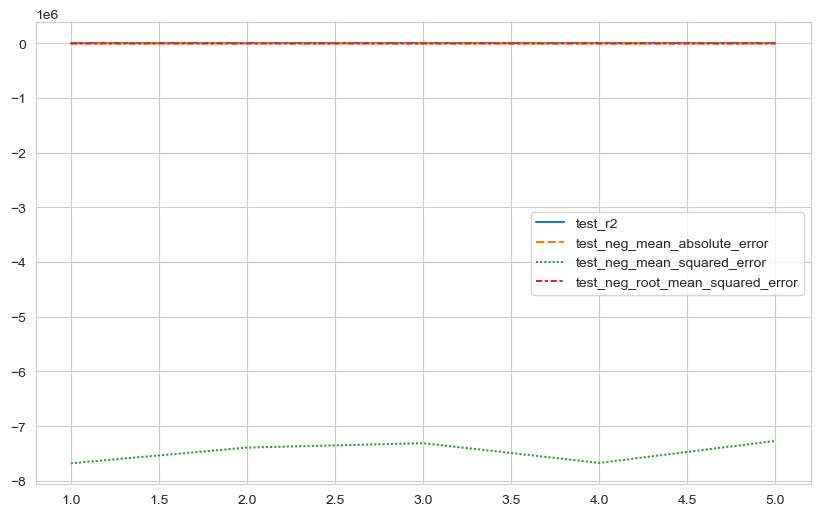

In [569]:
sns.lineplot(data=scores.iloc[:,2:])

In [570]:
lasso_model.coef_

array([ 0.00000000e+00,  3.92272593e+02, -1.47963655e+03, -1.89474685e+03,
       -4.68284312e+02, -1.77236710e+03, -4.92414995e+02,  8.74380778e+02,
       -4.52925248e+01, -6.92587721e+00,  1.19240163e+00,  2.95332084e+01,
        1.17197228e+02, -8.15399606e+01,  4.37258302e+02,  6.17789865e+01,
       -9.30825987e+02, -4.81014662e+02, -8.88265291e+02, -1.55615175e+03,
        4.43131530e+02,  6.64856651e+01,  5.35659620e+01,  1.08264002e+02,
        1.38727497e+01,  3.54197699e+02, -7.44642025e+02,  4.61580481e+02,
       -2.72241581e+02, -7.41549642e+01, -1.32450979e+03,  4.73614156e+02,
       -2.01327695e+03,  2.74362332e+03, -8.46731713e+01, -1.60058662e+02,
       -2.50118046e+02,  1.59491959e+02])

### Ridge ve Lasso Regresyon Modellerinin Karşılaştırılması

In [571]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["losso_coef_alpha_1"])

In [572]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis=1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_4.88,losso_coef_alpha_1
0,0.000000,0.000000,0.000000,0.000000
1,391.722431,391.955599,397.065407,392.272593
2,-1483.560463,-1483.047638,-1471.741312,-1479.636551
3,-1894.350608,-1894.227235,-1891.364496,-1894.746848
4,-474.146194,-473.582998,-461.255176,-468.284312
5,-1776.487712,-1776.074804,-1766.917923,-1772.367103
6,-496.589549,-496.524444,-495.040367,-492.414995
7,871.763083,871.988031,876.752362,874.380778
8,-46.106334,-46.104963,-46.071549,-45.292525
9,-7.731391,-7.725531,-7.597085,-6.925877


### Choosing best alpha value with Cross Validation (CV) (Lasso)

In [573]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv = 5,  max_iter=10000, random_state = 42)

In [574]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([20.        , 21.11111111, 22.22222222, 23.33333333, 24.44444444,
       25.55555556, 26.66666667, 27.77777778, 28.88888889, 30.        ]),
        cv=5, max_iter=10000, random_state=42)

In [575]:
print(lasso_cv_model.n_iter_) ## Modelin iterasyon sayısını görmek için

42


In [576]:
lasso_cv_model.alpha_

20.0

In [577]:
best_alpha = lasso_cv_model.alpha_

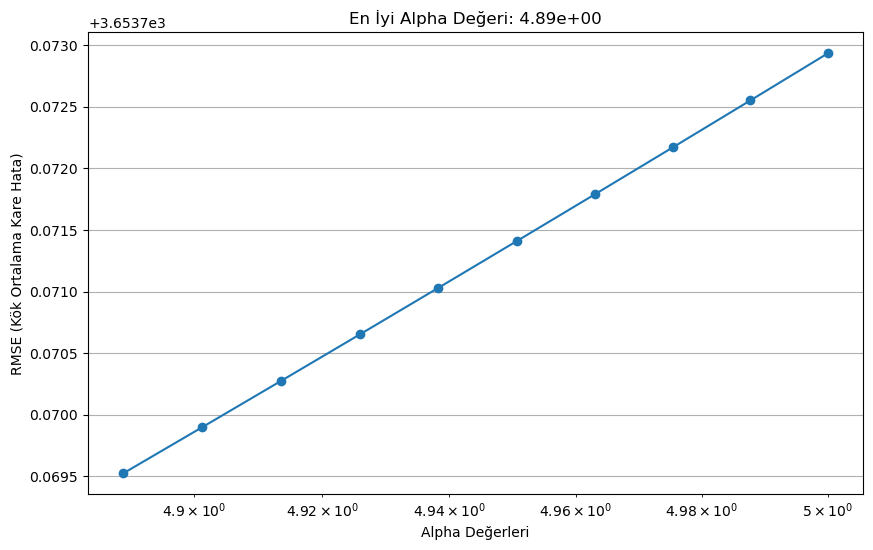

In [245]:
rmse_values = []
for alpha in alpha_space:
    lasso_model = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    lasso_model.fit(X, y)
    y_pred = lasso_model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    rmse_values.append(rmse)

# Alpha değerlerini ve RMSE değerlerini görselleştirin
plt.figure(figsize=(10, 6))
plt.plot(alpha_space, rmse_values, marker='o')
plt.xscale('log')  # X eksenini logaritmik ölçekte ayarlayın
plt.xlabel('Alpha Değerleri')
plt.ylabel('RMSE (Kök Ortalama Kare Hata)')
plt.title(f'En İyi Alpha Değeri: {best_alpha:.2e}')
plt.grid()
plt.show()

In [578]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [579]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.864751,0.872668
mse,7386005.933722,6871788.751094
rmse,2717.720724,2621.409688
mae,NaN,1853.909862


In [580]:
pd.concat([ls, rs, rcs, lss, lcs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.865505,0.873112,0.865505,0.873113,0.865499,0.873115,0.865502,0.873112,0.864751,0.872668
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250,7345175.356560,6847666.471084,7344982.784787,6847862.315720,7386005.933722,6871788.751094
rmse,2710.138865,2616.833672,2710.138977,2616.830008,2710.198398,2616.804630,2710.162871,2616.842050,2717.720724,2621.409688
mae,NaN,1850.489890,NaN,1850.466510,NaN,1849.967585,NaN,1850.731229,NaN,1853.909862


In [581]:
lasso_cv_model.coef_

array([    0.        ,   395.35332791, -1411.82468713, -1868.27967565,
        -369.48547409, -1692.46405389,  -475.52162601,   893.63714718,
         -27.13066926,    -0.        ,    -0.        ,    -0.        ,
          31.08905316,   -70.77908287,   413.55998639,    32.78032687,
        -791.89588948,  -314.27628051,  -728.23869272, -1344.74760789,
         208.05436351,    46.03337055,    20.26016458,    88.5262671 ,
           0.        ,   347.15033314,  -752.41627002,   441.50380239,
        -251.64044267,   -53.34022575, -1290.83117667,   485.56507722,
       -2028.74348144,  2653.32906694,   -58.59416656,    -0.        ,
        -145.24715702,    16.25364441])

In [582]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_4.88"])

In [583]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_4.88,losso_coef_alpha_1,lasso_cv_coef_4.88
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,391.722431,391.955599,397.065407,392.272593,395.353328
2,-1483.560463,-1483.047638,-1471.741312,-1479.636551,-1411.824687
3,-1894.350608,-1894.227235,-1891.364496,-1894.746848,-1868.279676
4,-474.146194,-473.582998,-461.255176,-468.284312,-369.485474
5,-1776.487712,-1776.074804,-1766.917923,-1772.367103,-1692.464054
6,-496.589549,-496.524444,-495.040367,-492.414995,-475.521626
7,871.763083,871.988031,876.752362,874.380778,893.637147
8,-46.106334,-46.104963,-46.071549,-45.292525,-27.130669
9,-7.731391,-7.725531,-7.597085,-6.925877,-0.000000


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

In [584]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [592]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [593]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [594]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.820383,0.830879
mse,9808976.715797,9127050.535985
rmse,3131.928594,3021.100881
mae,NaN,2120.407834


In [595]:
pd.concat([ls, rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.865505,0.873112,0.865505,0.873113,0.865499,0.873115,0.865502,0.873112,0.864751,0.872668,0.820383,0.830879
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250,7345175.356560,6847666.471084,7344982.784787,6847862.315720,7386005.933722,6871788.751094,9808976.715797,9127050.535985
rmse,2710.138865,2616.833672,2710.138977,2616.830008,2710.198398,2616.804630,2710.162871,2616.842050,2717.720724,2621.409688,3131.928594,3021.100881
mae,NaN,1850.489890,NaN,1850.466510,NaN,1849.967585,NaN,1850.731229,NaN,1853.909862,NaN,2120.407834


### For Elastic_Net CV with Deafult alpha=1 and l1_ratio = 0.5

In [596]:
model = ElasticNet(alpha=4.8889, l1_ratio=0.5, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [597]:
scores = pd.DataFrame(scores, index = range(1,6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.661358,-3127.411973,-18197991.691894,-4265.910418
2,0.665473,-3144.853515,-18804307.442998,-4336.393368
3,0.658151,-3059.249153,-17400248.634221,-4171.360526
4,0.650008,-3232.432551,-19694727.797394,-4437.874243
5,0.661165,-3100.295196,-18925253.680640,-4350.316504


In [598]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                    0.659231
test_neg_mean_absolute_error           -3132.848478
test_neg_mean_squared_error        -18604505.849430
test_neg_root_mean_squared_error       -4312.371012
dtype: float64

In [599]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.820383,0.830879
mse,9808976.715797,9127050.535985
rmse,3131.928594,3021.100881
mae,NaN,2120.407834


In [600]:
elastic_model.coef_

array([    0.        ,   554.65883156,  -611.97502536, -1182.77819701,
         117.38038757,  -878.95791797,  -230.30207674,   757.49411527,
         -18.81337555,    -6.13389665,   -88.87340851,    48.90588914,
         -76.55137747,   -64.78799102,   630.08543178,   105.96127069,
        -235.49475396,   342.28284353,   -97.43995609,  -688.42638181,
         -53.19316956,    64.56487342,   -14.9217988 ,    12.43373748,
         -27.66990521,   471.75609639,  -635.94395588,   371.89294303,
        -231.70181448,   -48.25347562, -1125.85177301,   864.34617427,
       -1320.93003021,  1516.74115034,   -19.70598678,   195.62983544,
         397.76654281,   235.55027852])

In [601]:
em_df = pd.DataFrame(elastic_model.coef_, columns = ["elastic_coef_(apl:1) l1:0.5"])

In [602]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_model.coef_4.88,losso_coef_alpha_1,lasso_cv_coef_4.88,elastic_coef_(apl:1) l1:0.5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,391.722431,391.955599,397.065407,392.272593,395.353328,554.658832
2,-1483.560463,-1483.047638,-1471.741312,-1479.636551,-1411.824687,-611.975025
3,-1894.350608,-1894.227235,-1891.364496,-1894.746848,-1868.279676,-1182.778197
4,-474.146194,-473.582998,-461.255176,-468.284312,-369.485474,117.380388
5,-1776.487712,-1776.074804,-1766.917923,-1772.367103,-1692.464054,-878.957918
6,-496.589549,-496.524444,-495.040367,-492.414995,-475.521626,-230.302077
7,871.763083,871.988031,876.752362,874.380778,893.637147,757.494115
8,-46.106334,-46.104963,-46.071549,-45.292525,-27.130669,-18.813376
9,-7.731391,-7.725531,-7.597085,-6.925877,-0.000000,-6.133897


### Choosing best alpha and l1_ratio values with Cross-Validation (Elastic)

In [611]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space,
                                l1_ratio=[0.0, 0.5, 0.7,0.9,0.95,1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [612]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([20.        , 21.11111111, 22.22222222, 23.33333333, 24.44444444,
       25.55555556, 26.66666667, 27.77777778, 28.88888889, 30.        ]),
             cv=5, l1_ratio=[0.0, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [613]:
elastic_cv_model.alpha_

20.0

In [614]:
elastic_cv_model.l1_ratio_

1.0

In [615]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [616]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.864751,0.872668
mse,7386005.933722,6871788.751094
rmse,2717.720724,2621.409688
mae,NaN,1853.909862


In [617]:
pd.concat([ls, rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.865505,0.873112,0.865505,0.873113,0.865499,0.873115,0.865502,0.873112,0.864751,0.872668,0.820383,0.830879,0.864751,0.872668
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250,7345175.356560,6847666.471084,7344982.784787,6847862.315720,7386005.933722,6871788.751094,9808976.715797,9127050.535985,7386005.933722,6871788.751094
rmse,2710.138865,2616.833672,2710.138977,2616.830008,2710.198398,2616.804630,2710.162871,2616.842050,2717.720724,2621.409688,3131.928594,3021.100881,2717.720724,2621.409688
mae,NaN,1850.489890,NaN,1850.466510,NaN,1849.967585,NaN,1850.731229,NaN,1853.909862,NaN,2120.407834,NaN,1853.909862


In [618]:
elastic_cv_model.coef_

array([    0.        ,   395.35332791, -1411.82468713, -1868.27967565,
        -369.48547409, -1692.46405389,  -475.52162601,   893.63714718,
         -27.13066926,    -0.        ,    -0.        ,    -0.        ,
          31.08905316,   -70.77908287,   413.55998639,    32.78032687,
        -791.89588948,  -314.27628051,  -728.23869272, -1344.74760789,
         208.05436351,    46.03337055,    20.26016458,    88.5262671 ,
           0.        ,   347.15033314,  -752.41627002,   441.50380239,
        -251.64044267,   -53.34022575, -1290.83117667,   485.56507722,
       -2028.74348144,  2653.32906694,   -58.59416656,    -0.        ,
        -145.24715702,    16.25364441])

## Grid Search

In [619]:
from sklearn.model_selection import GridSearchCV

In [620]:
alpha_values = np.linspace(5.0,5.6, 20)
l1_ratio_values =np.linspace(0.999999,1,10)

param_grid = {"alpha": alpha_values,
               "l1_ratio": l1_ratio_values}

In [621]:
def perform_gridsearch(X_train_scaled, y_train, estimator, param_grid, cv=10, verbose=0):

    # GridSearchCV modelini oluştur
    grid_model = GridSearchCV(estimator=estimator,
                              param_grid=param_grid,
                              scoring="neg_root_mean_squared_error",
                              cv=cv,
                              verbose=verbose)

    grid_model.fit(X_train_scaled, y_train)

    # Sonuçları göster
    print("Best Params: ", grid_model.best_params_)
    print("Best Score: ", grid_model.best_score_)
    print("CV Count: ", grid_model.cv)
perform_gridsearch(X_train_scaled, y_train, elastic_model, param_grid)

Best Params:  {'alpha': 5.6, 'l1_ratio': 1.0}
Best Score:  -2723.928004285284
CV Count:  10


In [622]:
elastic_model = ElasticNet(max_iter = 10000, random_state = 42)

In [623]:
param_grid = {"alpha":[0.0, 0.012, 0.2,0.5,0.6, 0.7,1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [624]:
grid_model = GridSearchCV(estimator= elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 0) # verbose alttaki raporu verdi

In [625]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.0, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [626]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [628]:
grid_model.best_index_

48

In [629]:
grid_model.best_score_

-2724.4364259397507

In [630]:
gscs = train_val(y_train, y_train_pred, y_test, y_pred, "grids_cv")
gscs

,grids_cv_train,grids_cv_test
R2,0.864751,0.872668
mse,7386005.933722,6871788.751094
rmse,2717.720724,2621.409688
mae,NaN,1853.909862


In [633]:
df_gorsel=pd.concat([ls, rs, rcs, lss, lcs, es, ecs, gscs], axis = 1)
df_gorsel

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,grids_cv_train,grids_cv_test
R2,0.865505,0.873112,0.865505,0.873113,0.865499,0.873115,0.865502,0.873112,0.864751,0.872668,0.820383,0.830879,0.864751,0.872668,0.864751,0.872668
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250,7345175.356560,6847666.471084,7344982.784787,6847862.315720,7386005.933722,6871788.751094,9808976.715797,9127050.535985,7386005.933722,6871788.751094,7386005.933722,6871788.751094
rmse,2710.138865,2616.833672,2710.138977,2616.830008,2710.198398,2616.804630,2710.162871,2616.842050,2717.720724,2621.409688,3131.928594,3021.100881,2717.720724,2621.409688,2717.720724,2621.409688
mae,NaN,1850.489890,NaN,1850.466510,NaN,1849.967585,NaN,1850.731229,NaN,1853.909862,NaN,2120.407834,NaN,1853.909862,NaN,1853.909862


### Using Best Hyper Parameters From GridSearch

In [634]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [291]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.752205,0.765906
mse,13532221.934320,12633465.291011
rmse,3678.616851,3554.358633
mae,NaN,2659.500056


## Feature Importance 

#### Feature Importance with Ridge

In [660]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz 

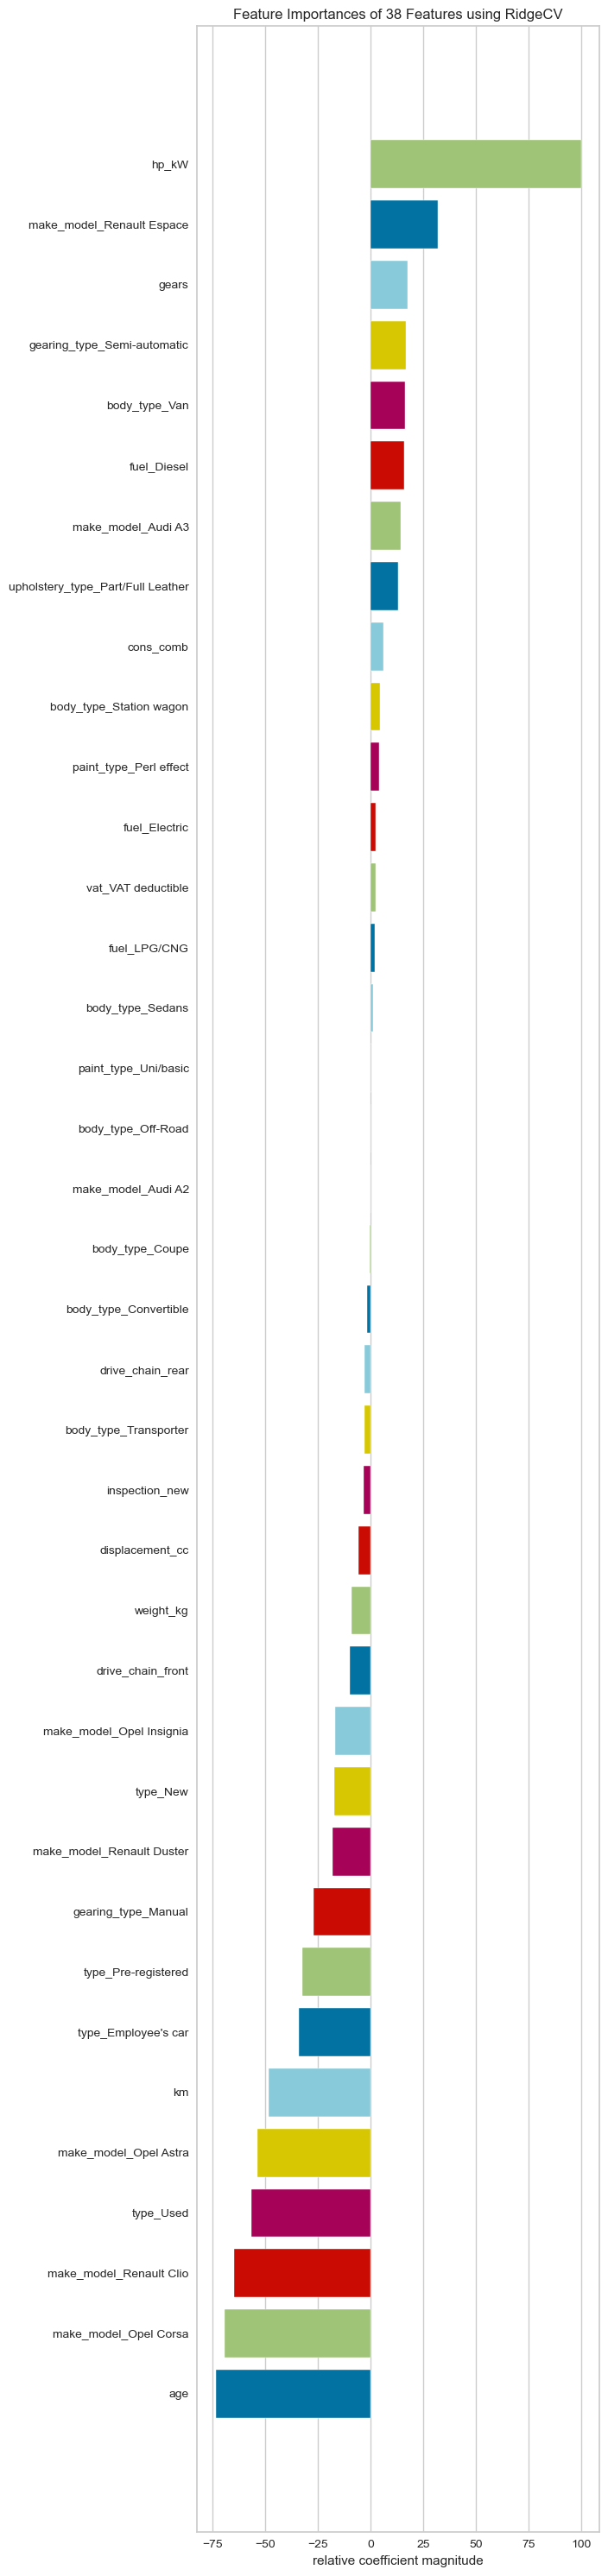

<Axes: title={'center': 'Feature Importances of 38 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [661]:
viz = FeatureImportances(ridge_cv_model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature Importance with Lasso

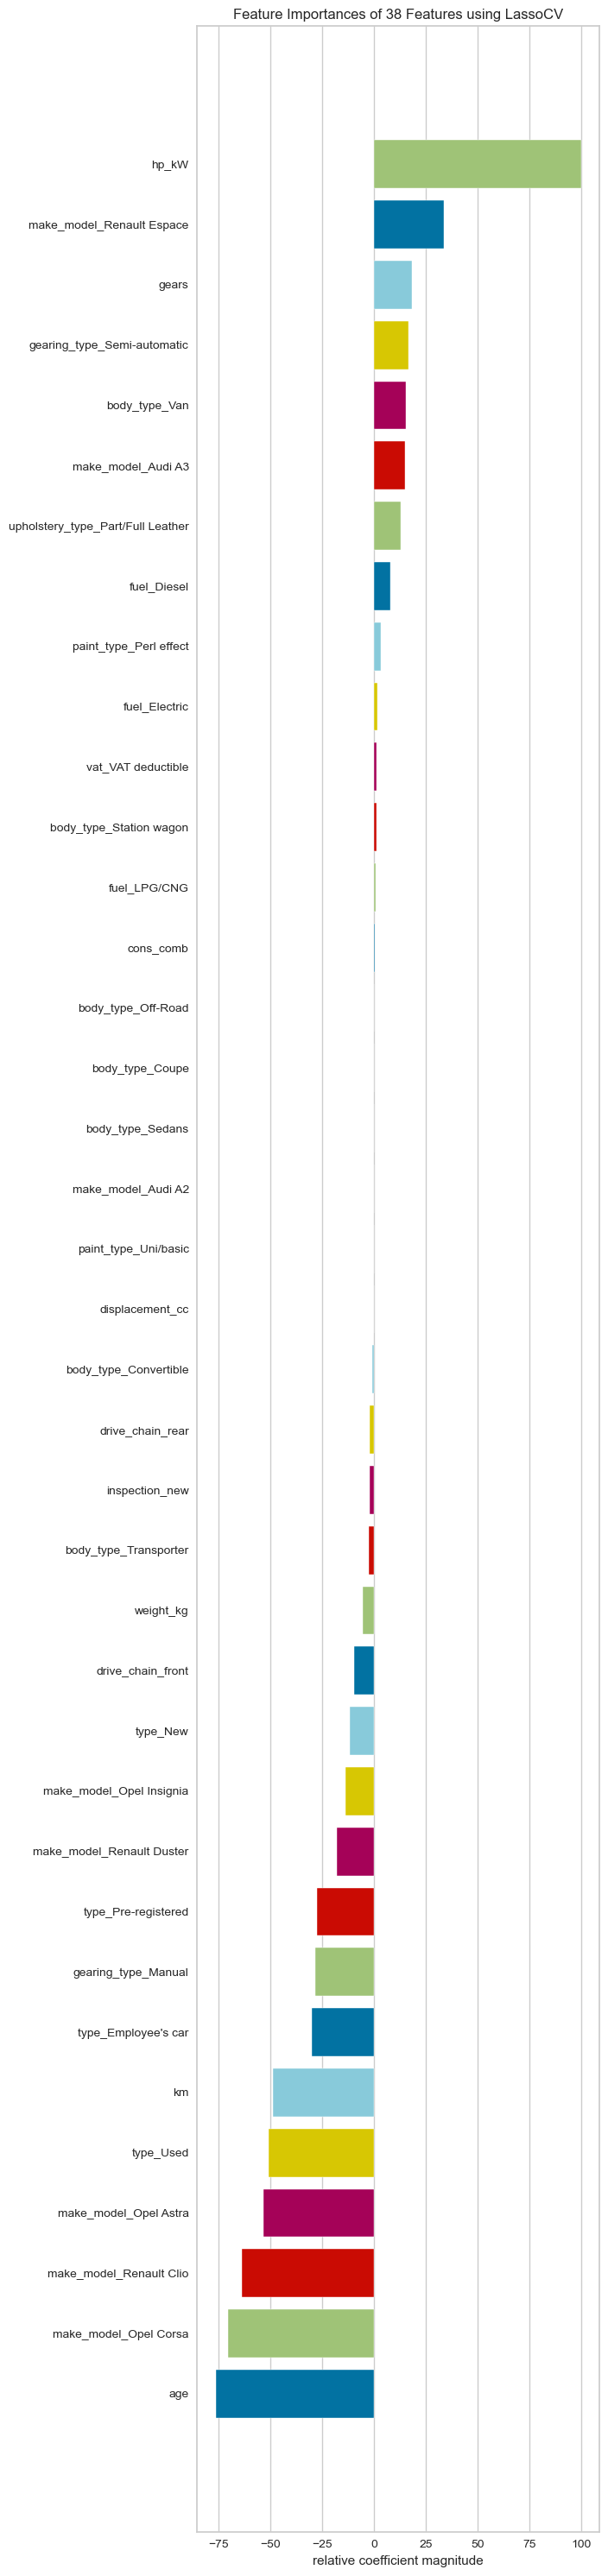

<Axes: title={'center': 'Feature Importances of 38 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [662]:
viz = FeatureImportances(lasso_cv_model, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## 7. Visually Compare Models Performance In a Graph

In [651]:
df_gorsel

,linear_train,linear_test,ridge_train,ridge_test,rigde_cv_train,rigde_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test,grids_cv_train,grids_cv_test
R2,0.865505,0.873112,0.865505,0.873113,0.865499,0.873115,0.865502,0.873112,0.864751,0.872668,0.820383,0.830879,0.864751,0.872668,0.864751,0.872668
mse,7344852.666620,6847818.469058,7344853.275594,6847799.293250,7345175.356560,6847666.471084,7344982.784787,6847862.315720,7386005.933722,6871788.751094,9808976.715797,9127050.535985,7386005.933722,6871788.751094,7386005.933722,6871788.751094
rmse,2710.138865,2616.833672,2710.138977,2616.830008,2710.198398,2616.804630,2710.162871,2616.842050,2717.720724,2621.409688,3131.928594,3021.100881,2717.720724,2621.409688,2717.720724,2621.409688
mae,NaN,1850.489890,NaN,1850.466510,NaN,1849.967585,NaN,1850.731229,NaN,1853.909862,NaN,2120.407834,NaN,1853.909862,NaN,1853.909862


In [637]:
df_gorsel.columns

Index(['linear_train', 'linear_test', 'ridge_train', 'ridge_test',
       'rigde_cv_train', 'rigde_cv_test', 'lasso_train', 'lasso_test',
       'lasso_cv_train', 'lasso_cv_test', 'elastic_train', 'elastic_test',
       'elastic_cv_train', 'elastic_cv_test', 'grids_cv_train',
       'grids_cv_test'],
      dtype='object')

In [652]:
df_gorsel.index

Index(['R2', 'mse', 'rmse', 'mae'], dtype='object')

In [654]:
T=df_gorsel.T

<Axes: ylabel='R2,mse,rmse,mae'>

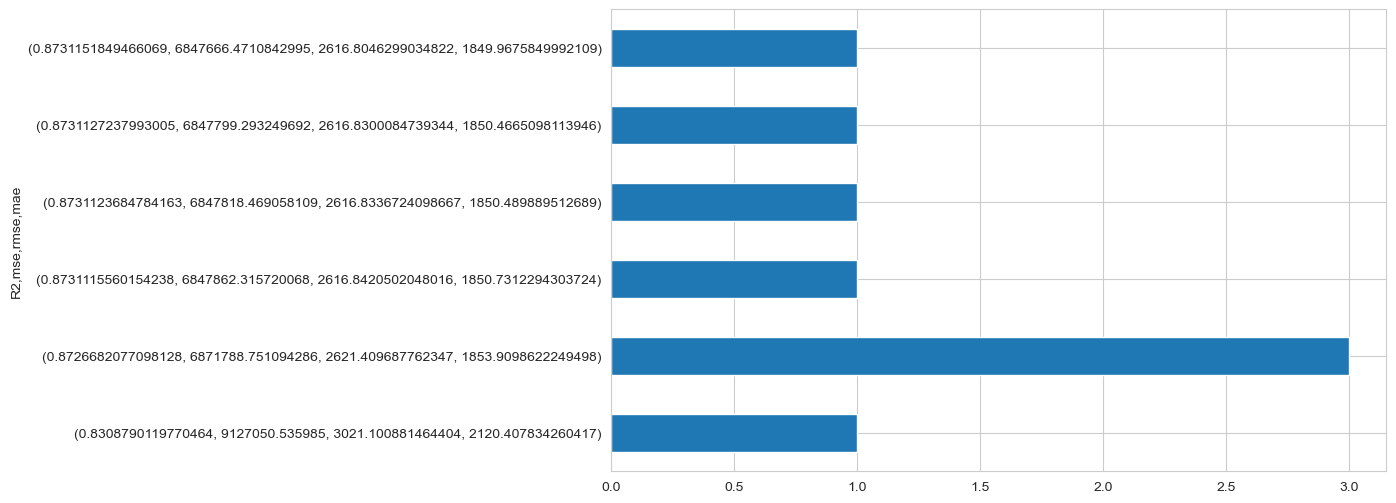

In [656]:
T.value_counts().sort_index().plot.barh()

<Axes: ylabel='Frequency'>

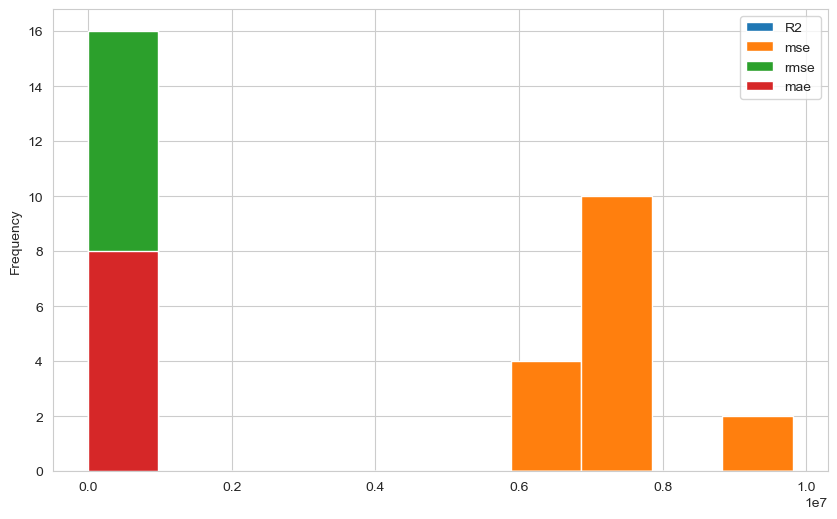

In [657]:
T.plot.hist()

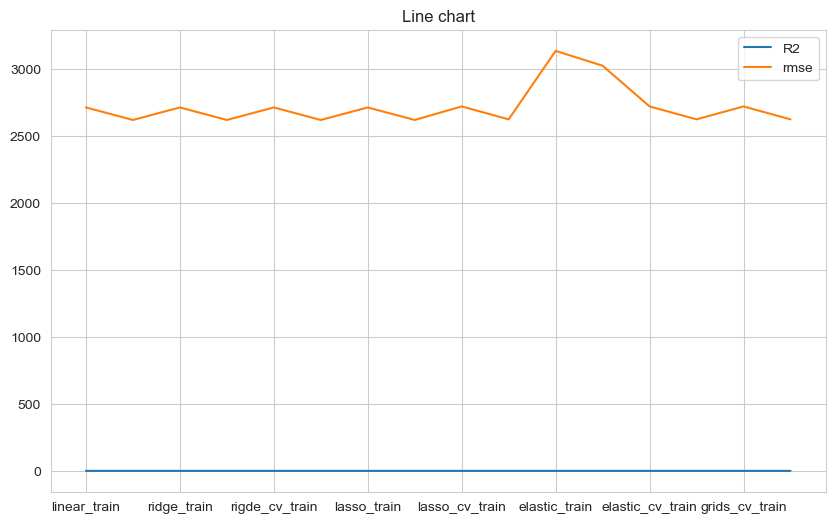

In [658]:
T[["R2", 'rmse']].plot.line( title='Line chart');

## Prediction new observation

## random state=42

### Final Model and Model Deployment

In [663]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)

In [664]:
final_model = ElasticNet(alpha=20.0, l1_ratio=1.0)

In [665]:
final_model.fit(X_scaled, y)

ElasticNet(alpha=20.0, l1_ratio=1.0)

In [667]:
# modelimizi tanimladik
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)
final_model = ElasticNet(alpha=20.0, l1_ratio=1.0)  
final_model.fit(X_scaled, y)


sample = pd.DataFrame(X)
sample.head()

df_48th_row = sample.iloc[47].tolist()

data = [[value] for value in df_48th_row]

scaled_data = final_scaler.fit_transform(data)

scaled_values_reshaped = scaled_data.reshape(1, -1)

predictions = final_model.predict(scaled_values_reshaped)

print(predictions)

[11289.51596618]


In [668]:
df_48th_row = sample.iloc[5].tolist()

In [669]:
df_48th_row

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 63668.0,
 7.0,
 3.0,
 85.0,
 0.0,
 1598.0,
 1135.0,
 3.5]

In [670]:
df.iloc[47]

make_model                                                       Audi A1
body_type                                                         Sedans
price                                                              11790
vat                                                       VAT deductible
km                                                          60000.000000
type                                                                Used
fuel                                                              Diesel
gears                                                           5.000000
comfort_convenience    Air conditioning,Electrical side mirrors,Leath...
entertainment_media                                                Radio
extras                                                      Alloy wheels
safety_security        ABS,Central door lock,Central door lock with r...
age                                                             3.000000
previous_owners                                    